In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler


## Finding experiments

To use `incense` we first have to instantiate an experiment loader that will enable us to query the database for specific runs.

In [3]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [4]:
query = {"$and": [
            {"config.autoencoder_type": "Over_dim"},
           
        ]}
experiments=loader.find(query)

In [5]:
experiments

QuerySet([Experiment(id=58, name=autoencoder_test), Experiment(id=59, name=autoencoder_test), Experiment(id=60, name=autoencoder_test), Experiment(id=61, name=autoencoder_test), Experiment(id=62, name=autoencoder_test), Experiment(id=63, name=autoencoder_test), Experiment(id=64, name=autoencoder_test), Experiment(id=65, name=autoencoder_test)])

In [6]:
experiments[0].config

pmap({'targets_type': 'Mnist', 'seed': 569721062, 'autoencoder_type': 'Over_dim_tied_iteration', 'epochs': 250, 'batch_size': 256, 'iteration': False})

In [7]:
experiments.project(on=["config.targets_type","config.targets_type", "config.iteration", "config.autoencoder_type", "config.batch_size"])

,targets_type,iteration,autoencoder_type,batch_size
exp_id,,,,
58,Mnist,False,Over_dim_tied_iteration,256
59,Mnist,False,Over_dim_tied_iteration,128
60,Mnist,False,Over_dim_tied_iteration,64
61,Mnist,False,Over_dim_tied_iteration,32
62,10_Targets,False,Over_dim_tied_iteration,256
63,10_Targets,False,Over_dim_tied_iteration,128
64,10_Targets,False,Over_dim_tied_iteration,64
65,10_Targets,False,Over_dim_tied_iteration,32


In [8]:
def print_imm(imgs,name):
    n = len(imgs[0]) # how many digits we will display
    if name:
        plt.figure(figsize=(2,0.5))
        plt.text(0.1, 0.1, name, fontsize=12) 
        plt.show()
    plt.figure(figsize=(2*len(imgs[0]), 2 * len(imgs) + 2))
    for i in range(n):
        for j in range(len(imgs)):
            # display original
            ax = plt.subplot(len(imgs), n, i + 1 + j * n)
            
            plt.imshow(imgs[j][i].reshape(28, 28))
            
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [9]:
def compare(data):
    evaluations_in_classifier=[]
    evaluations_feature_classifier=[]
    evaluations_out_classifier=[]
    autoencoder=[]
    predictions=[]
    pickle_artifact=[]
    
    for exp in experiments:
        #print(exp.id,exp.config)
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
        evaluations_in_classifier.append(predictions['evaluations_in_classifier'])
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        evaluations_out_classifier.append(predictions['evaluations_out_classifier'])
        autoencoder.append(predictions['evaluations_autoencoder'])
        

    print(data)
    names=[]
    for exp in experiments:
        names.append(exp.id)
    
    plt.rc('axes', prop_cycle=(cycler('color', ['r','g','b','y', 'r', 'g', 'b', 'y','r','g']) +
                           cycler('linestyle', ['-','-','-','-','--','--','--','--',':',':'])))
    
    plt.figure(figsize=(30,15))    

    plt.subplot(2, 3,1)
    plt.title("Accuracy over iterations evaluations_in_classifier") 
    i=0
    for exp in evaluations_in_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    plt.subplot(2, 3,2)
    plt.title("Accuracy over iterations evaluations_feature_classifier") 
    i=0
    for exp in evaluations_feature_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    
    plt.subplot(2, 3,3)
    plt.title("Accuracy over iterations evaluations_out_classifier") 
    i=0
    for exp in evaluations_out_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()  

    plt.subplot(2, 3,4)
    plt.title("Loss over iterations autoencoder") 
    i=0
    for exp in autoencoder:
        plt.plot([item[0] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
  
    
    
    plt.subplot(2, 3,6)
    plt.title("mae iterations autoencoder") 
    i=0
    for exp in autoencoder:
        plt.plot([item[2] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    plt.show()
    
    

In [10]:
name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']
#name_list=['predictions_df_0','predictions_df_10','predictions_df_20']

predictions_df_0


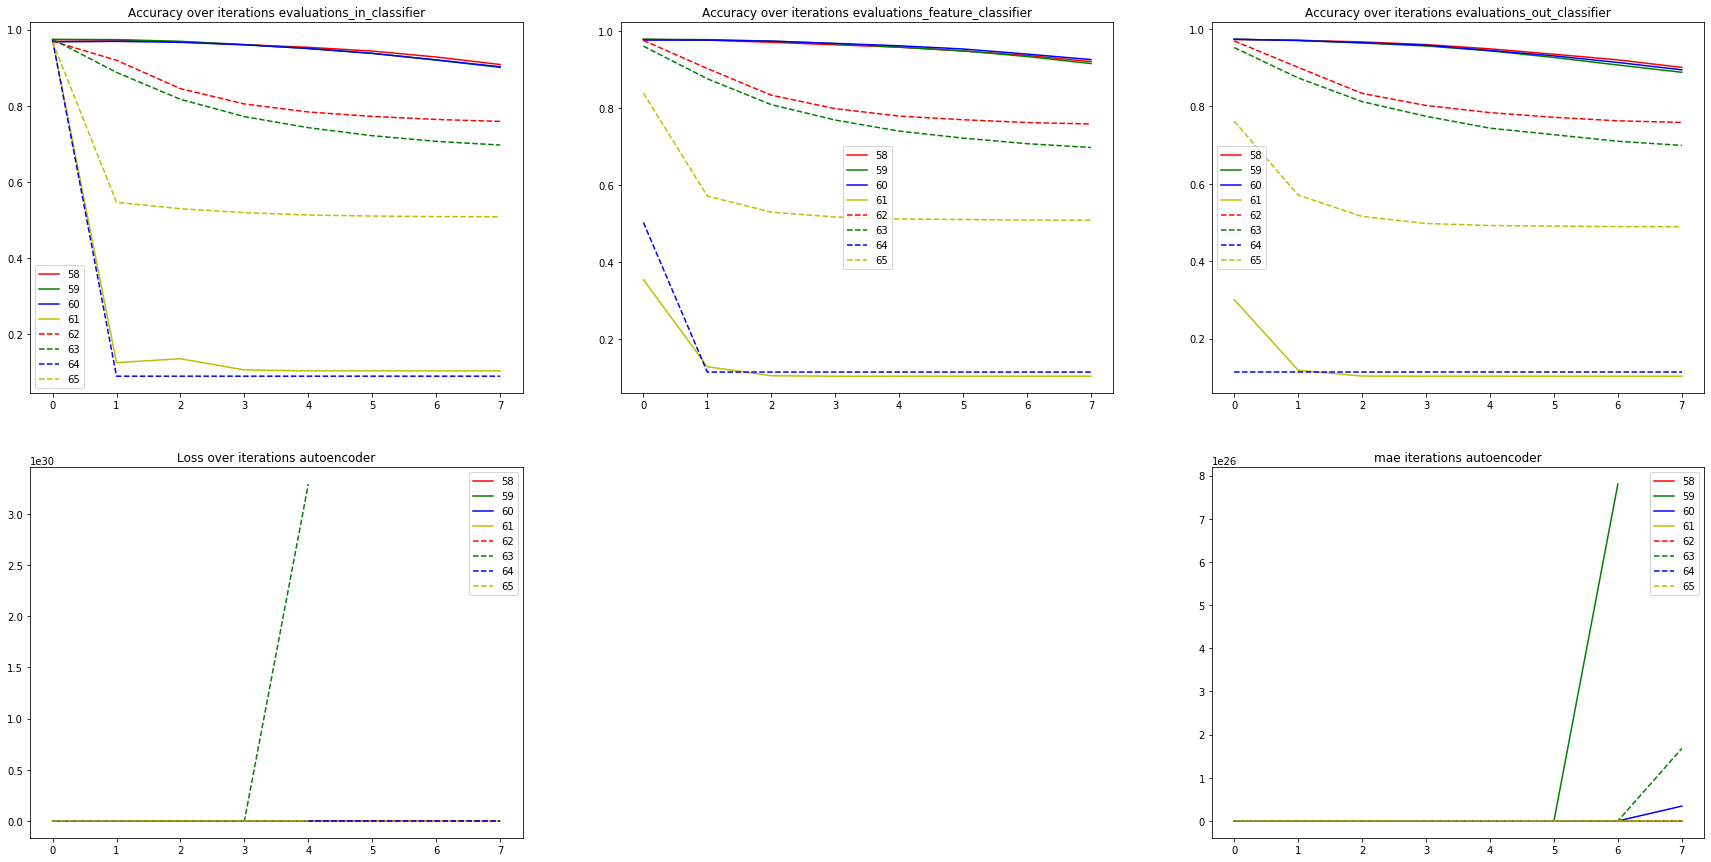

predictions_df_10


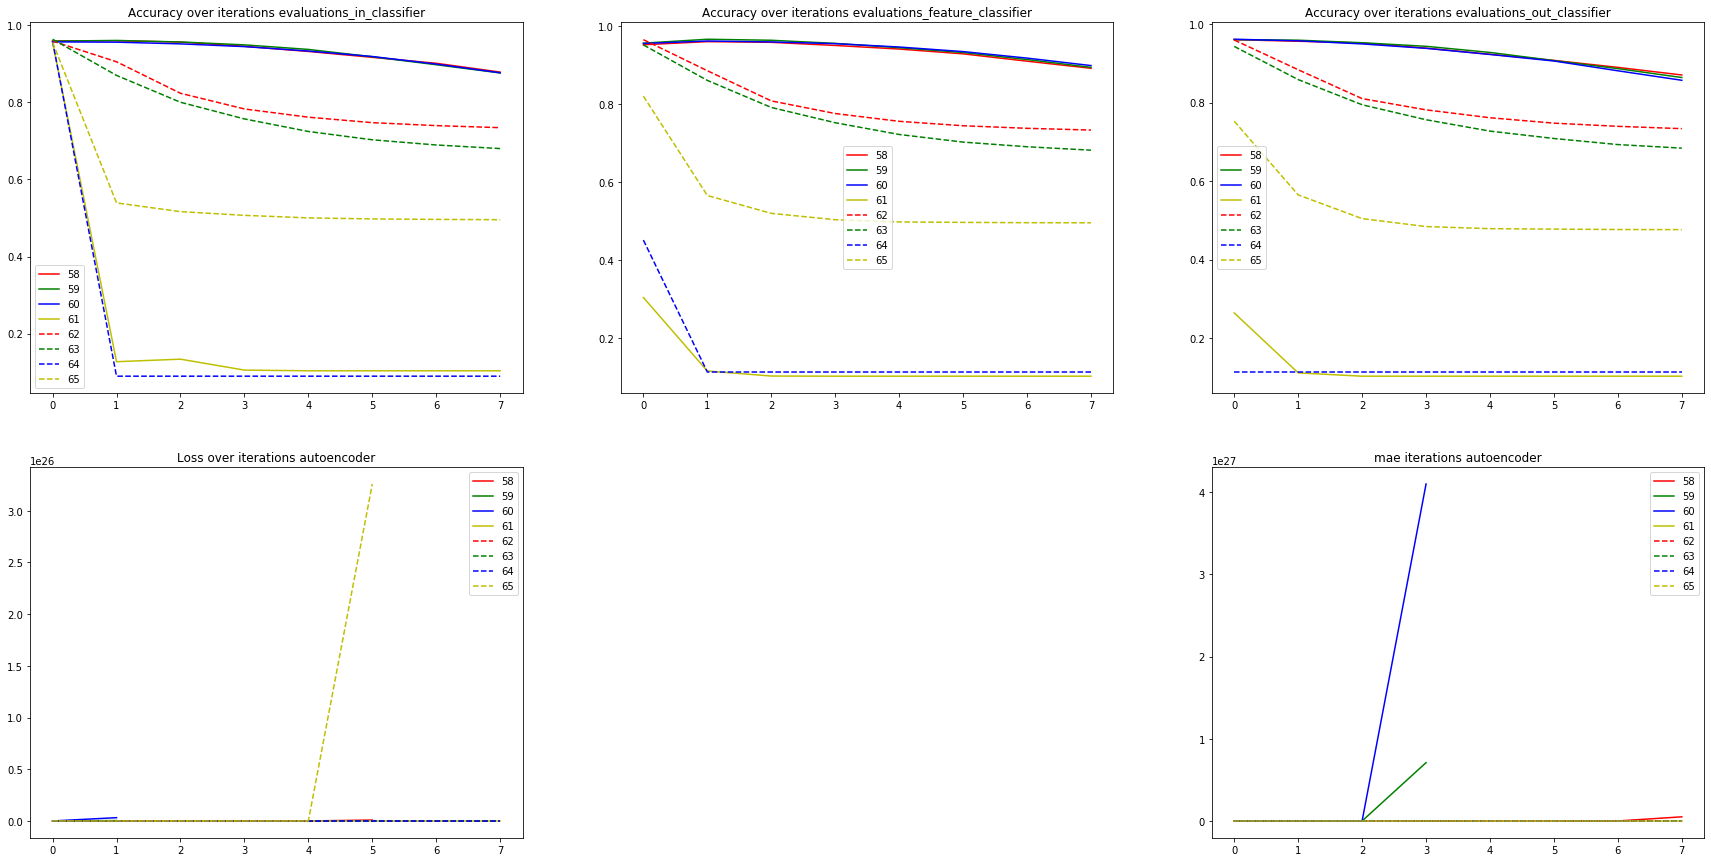

predictions_df_20


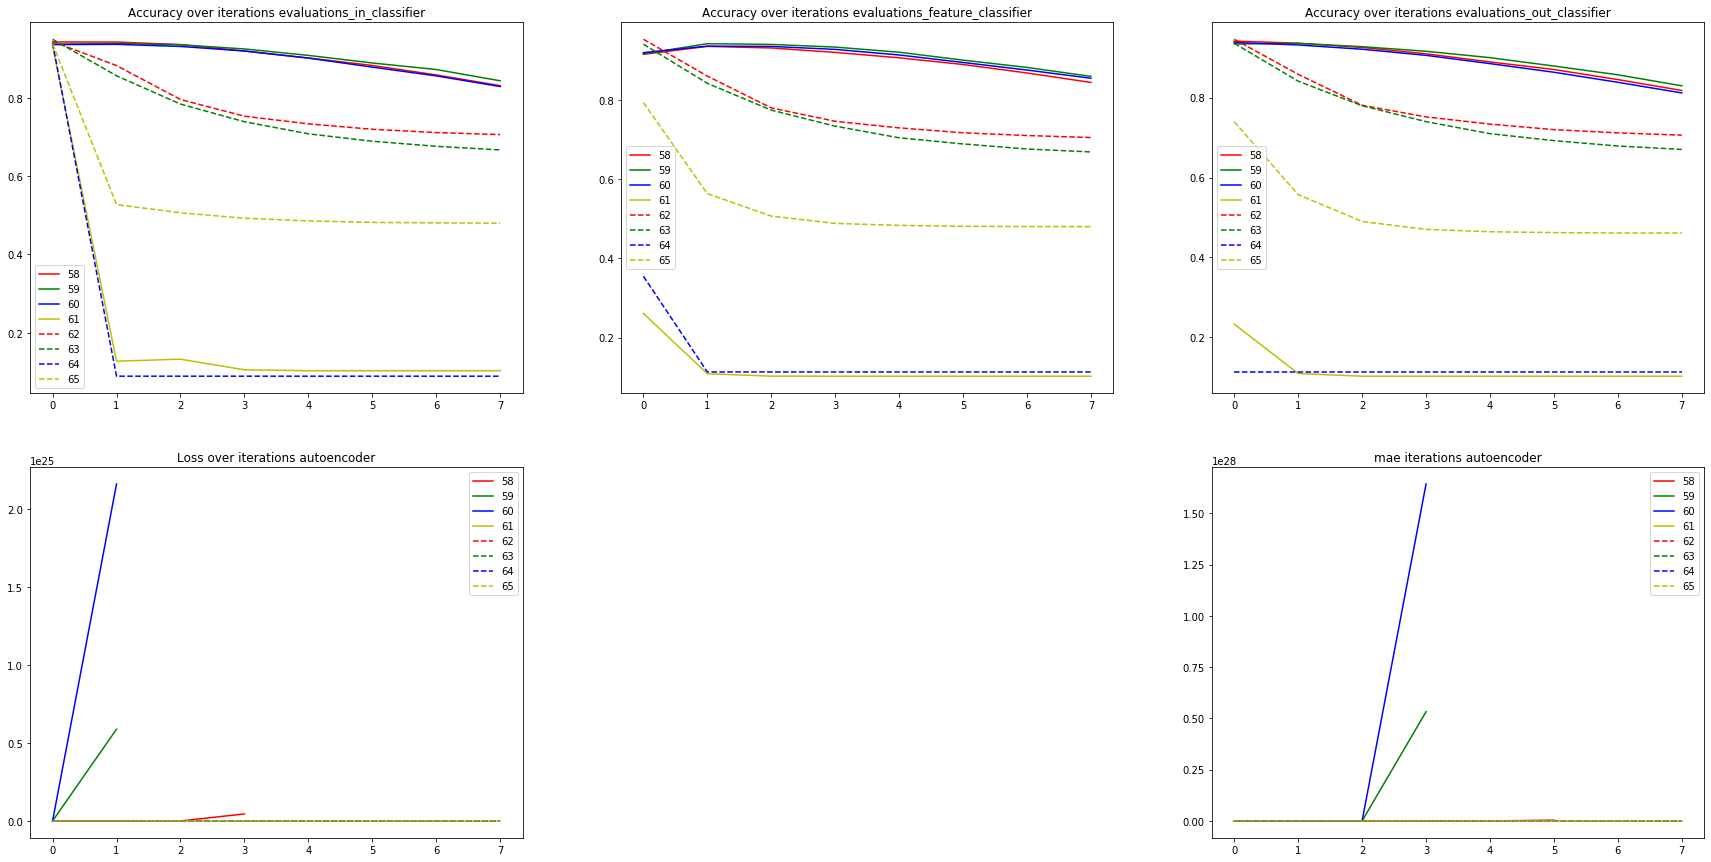

predictions_df_30


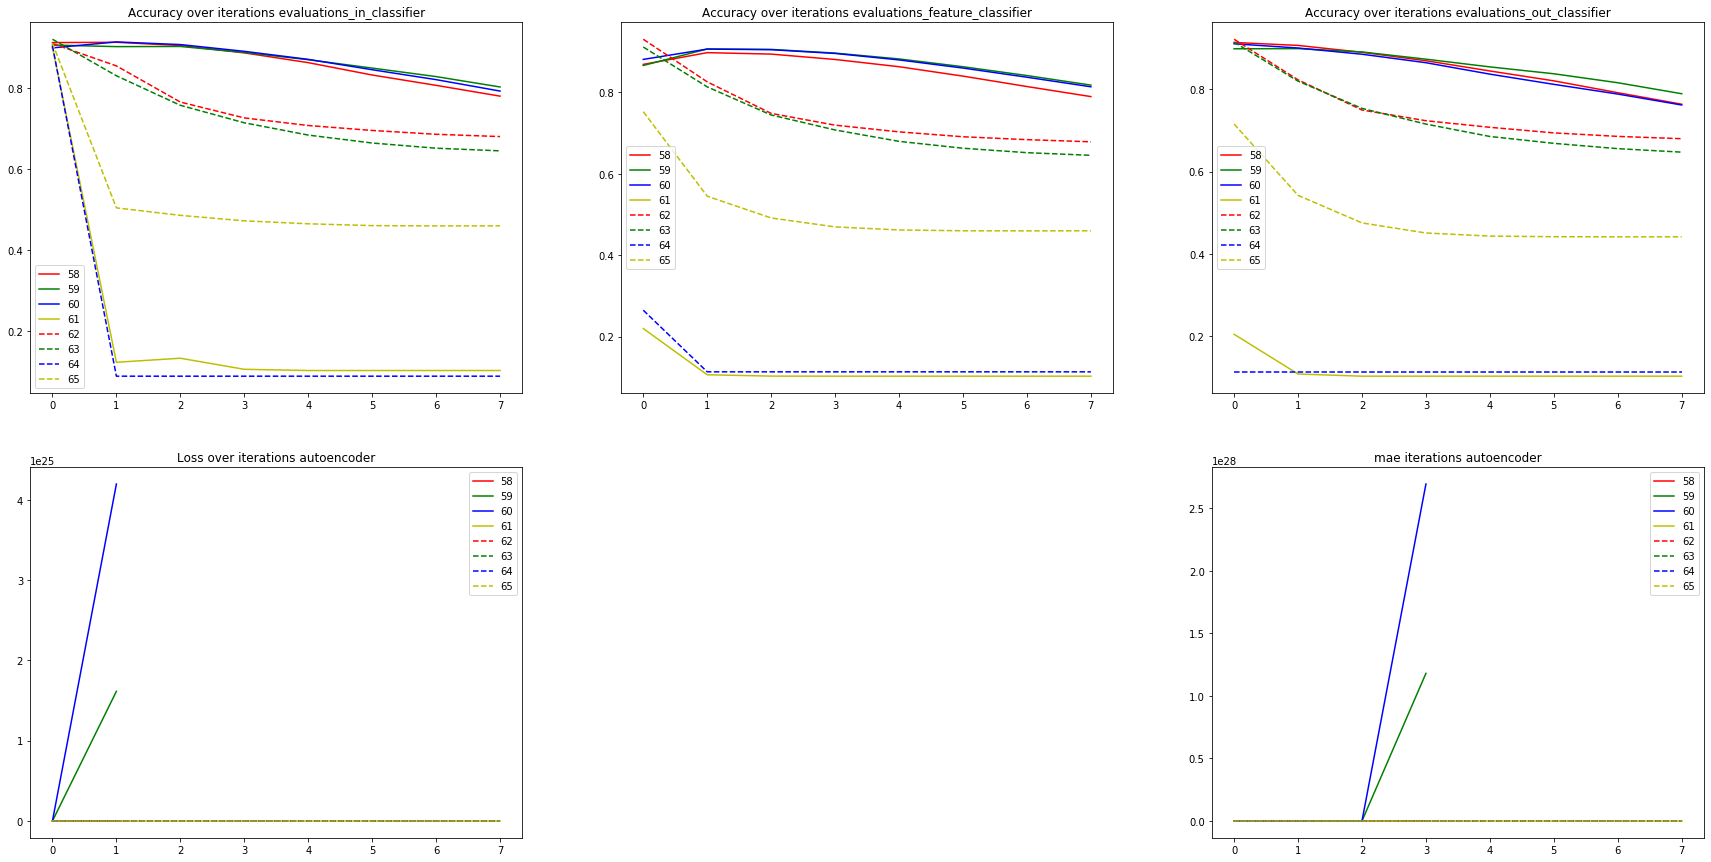

predictions_df_40


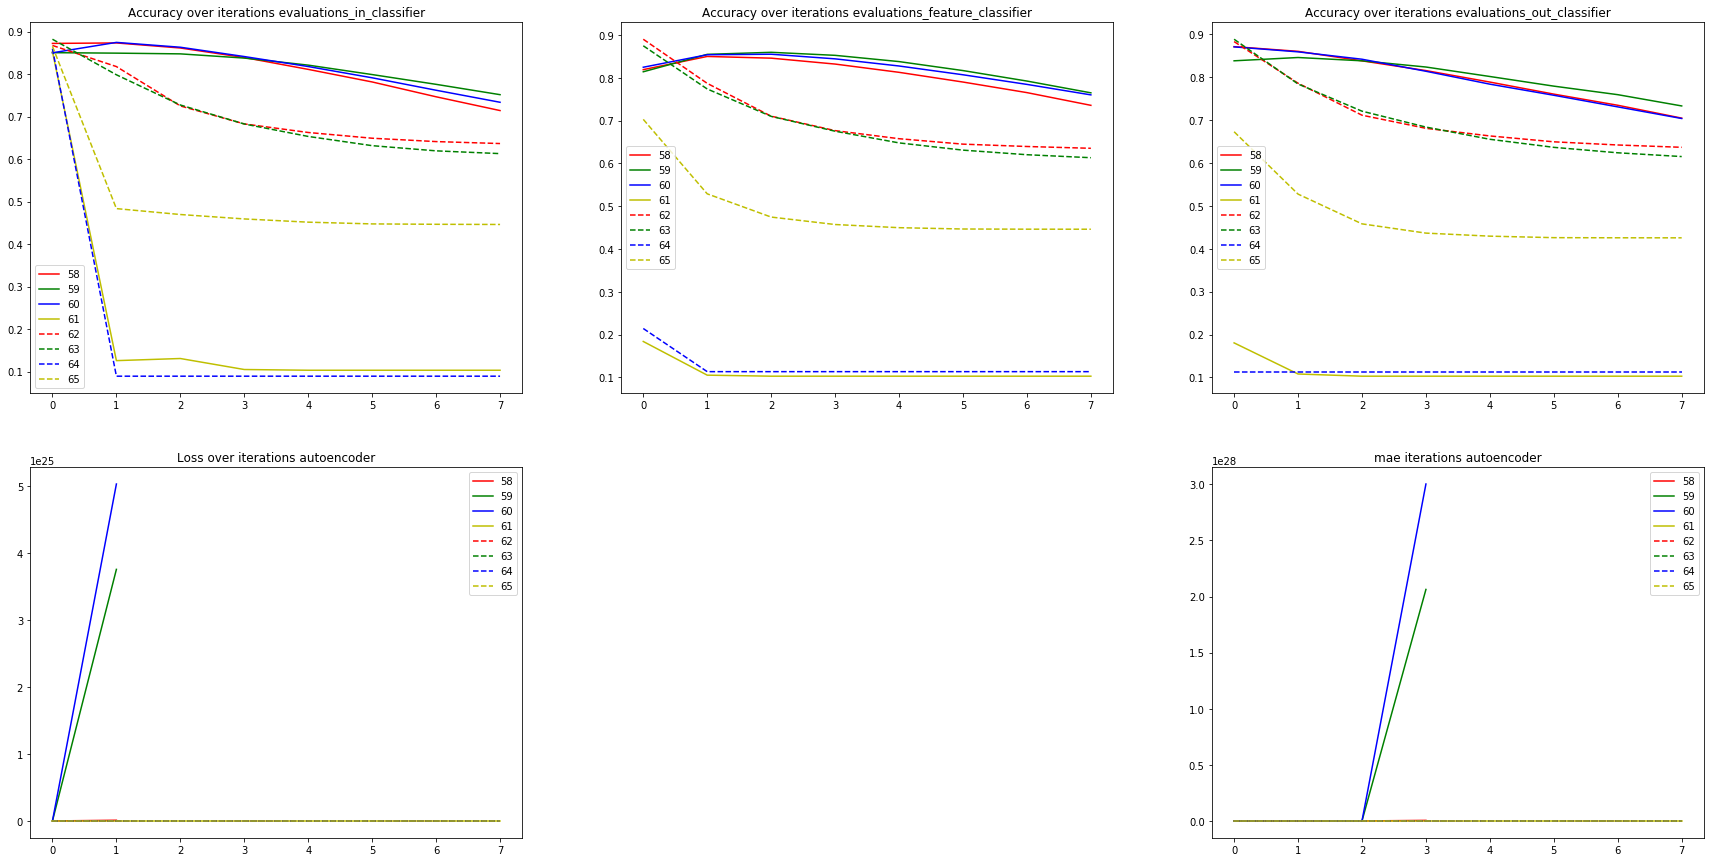

predictions_df_50


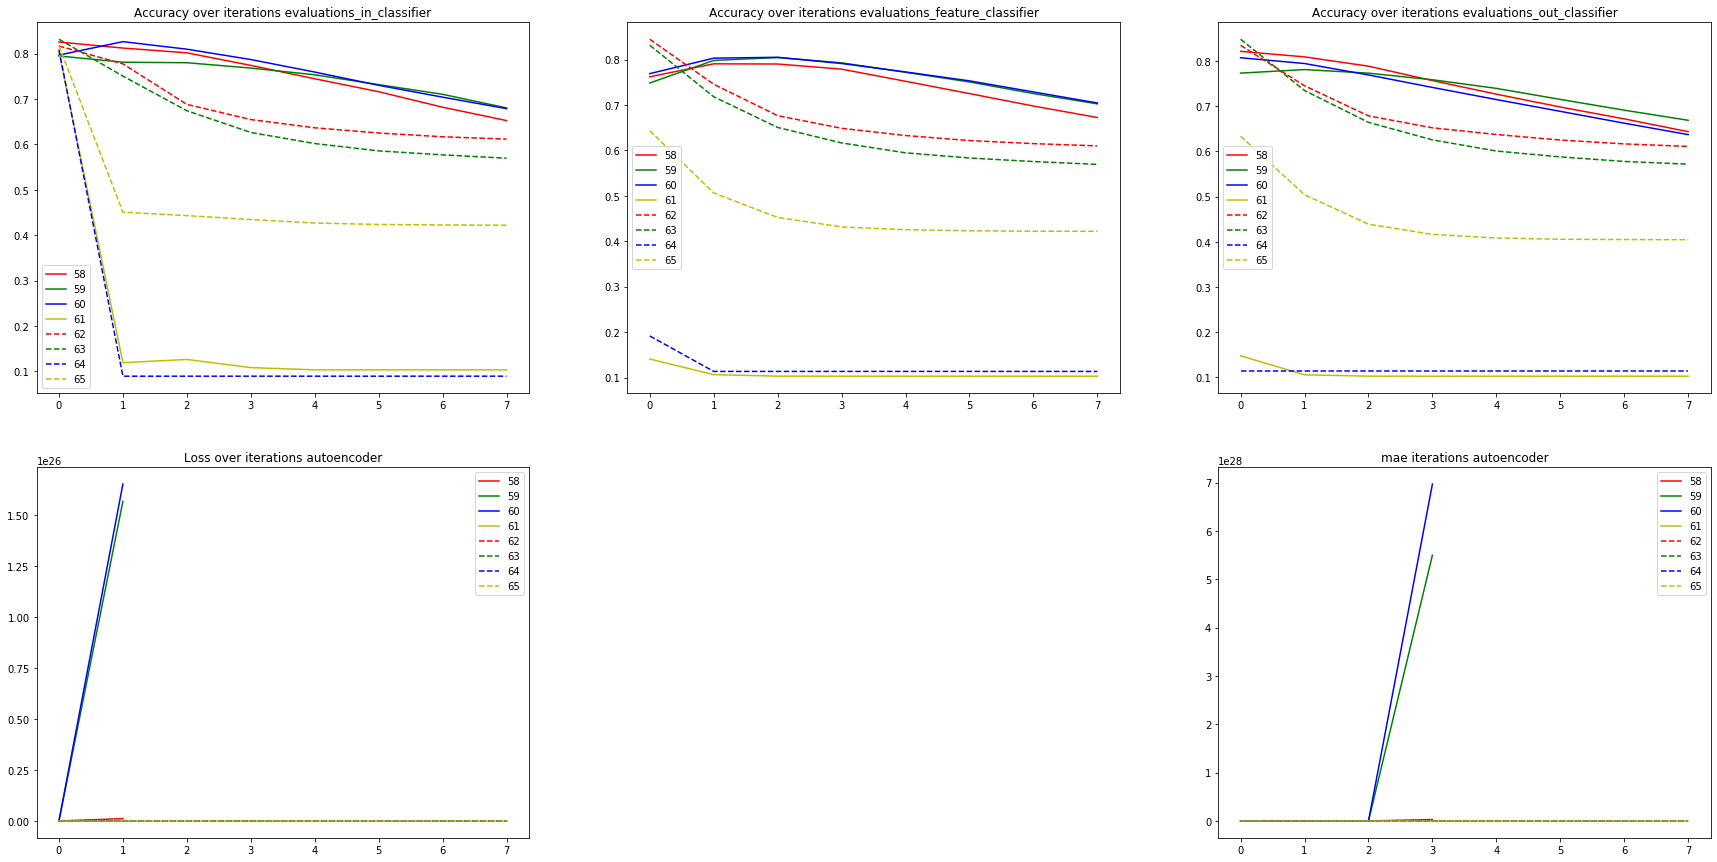

predictions_df_60


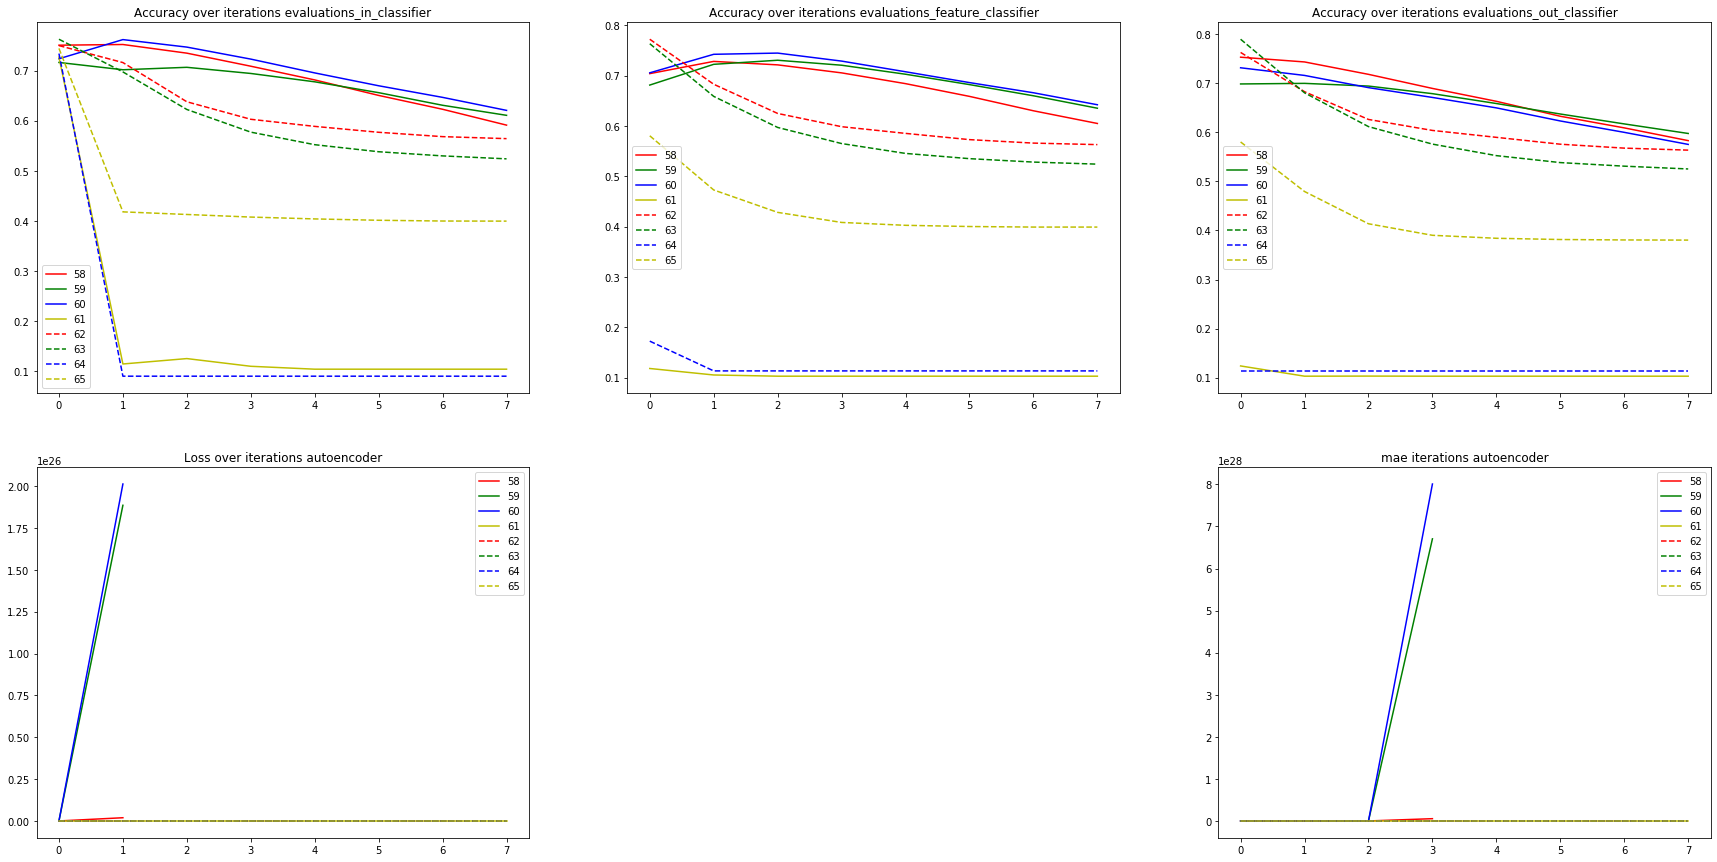

predictions_df_70


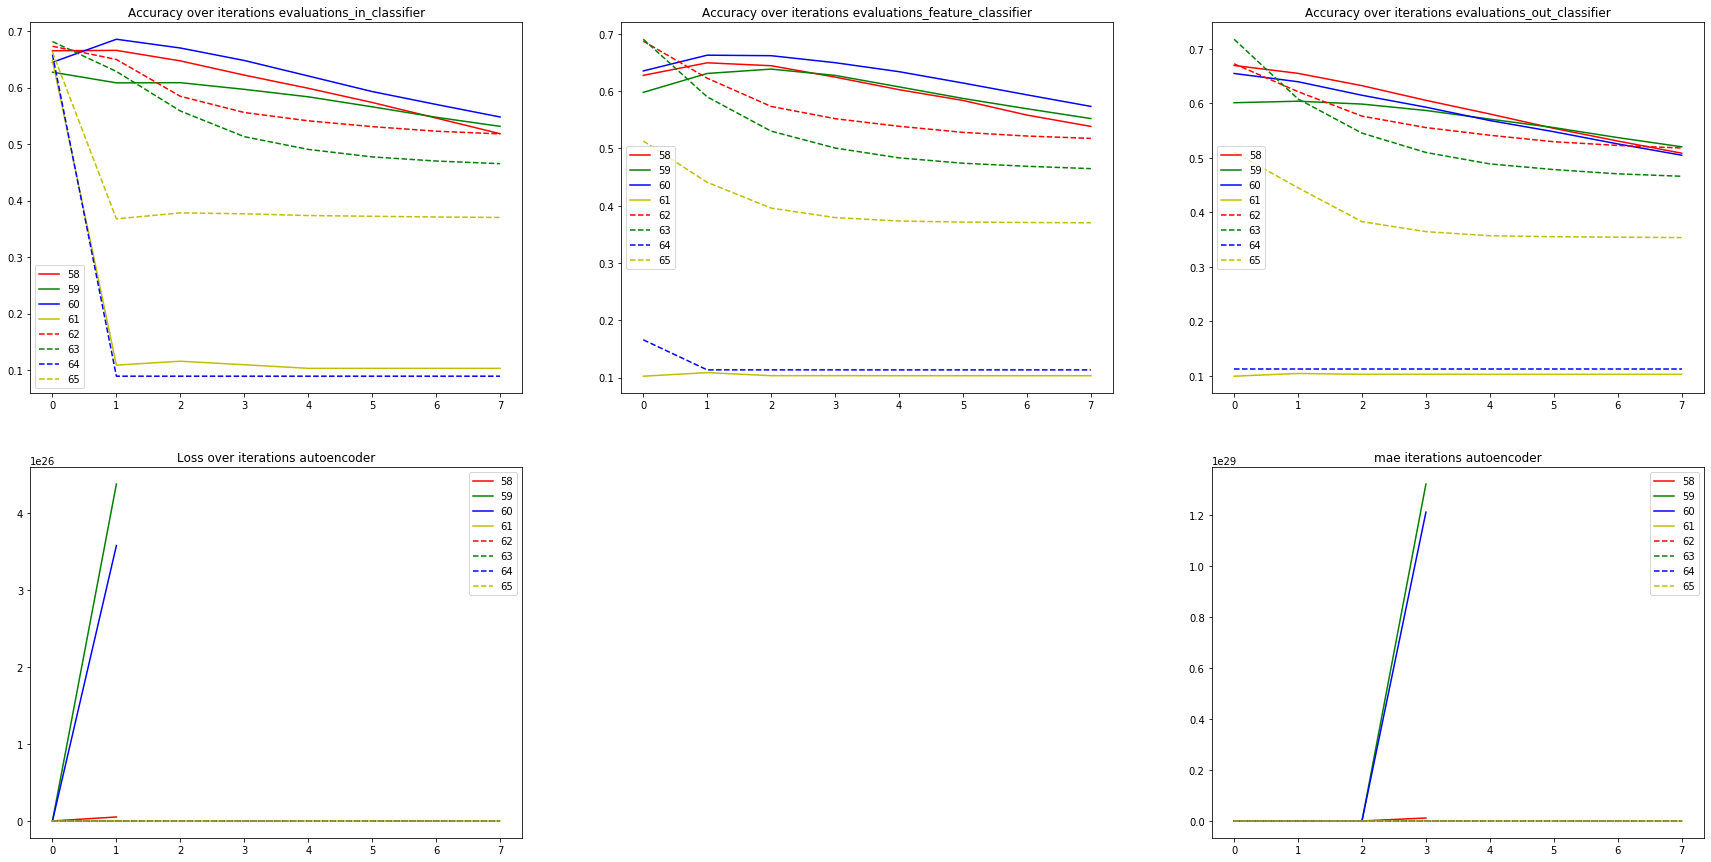

predictions_df_80


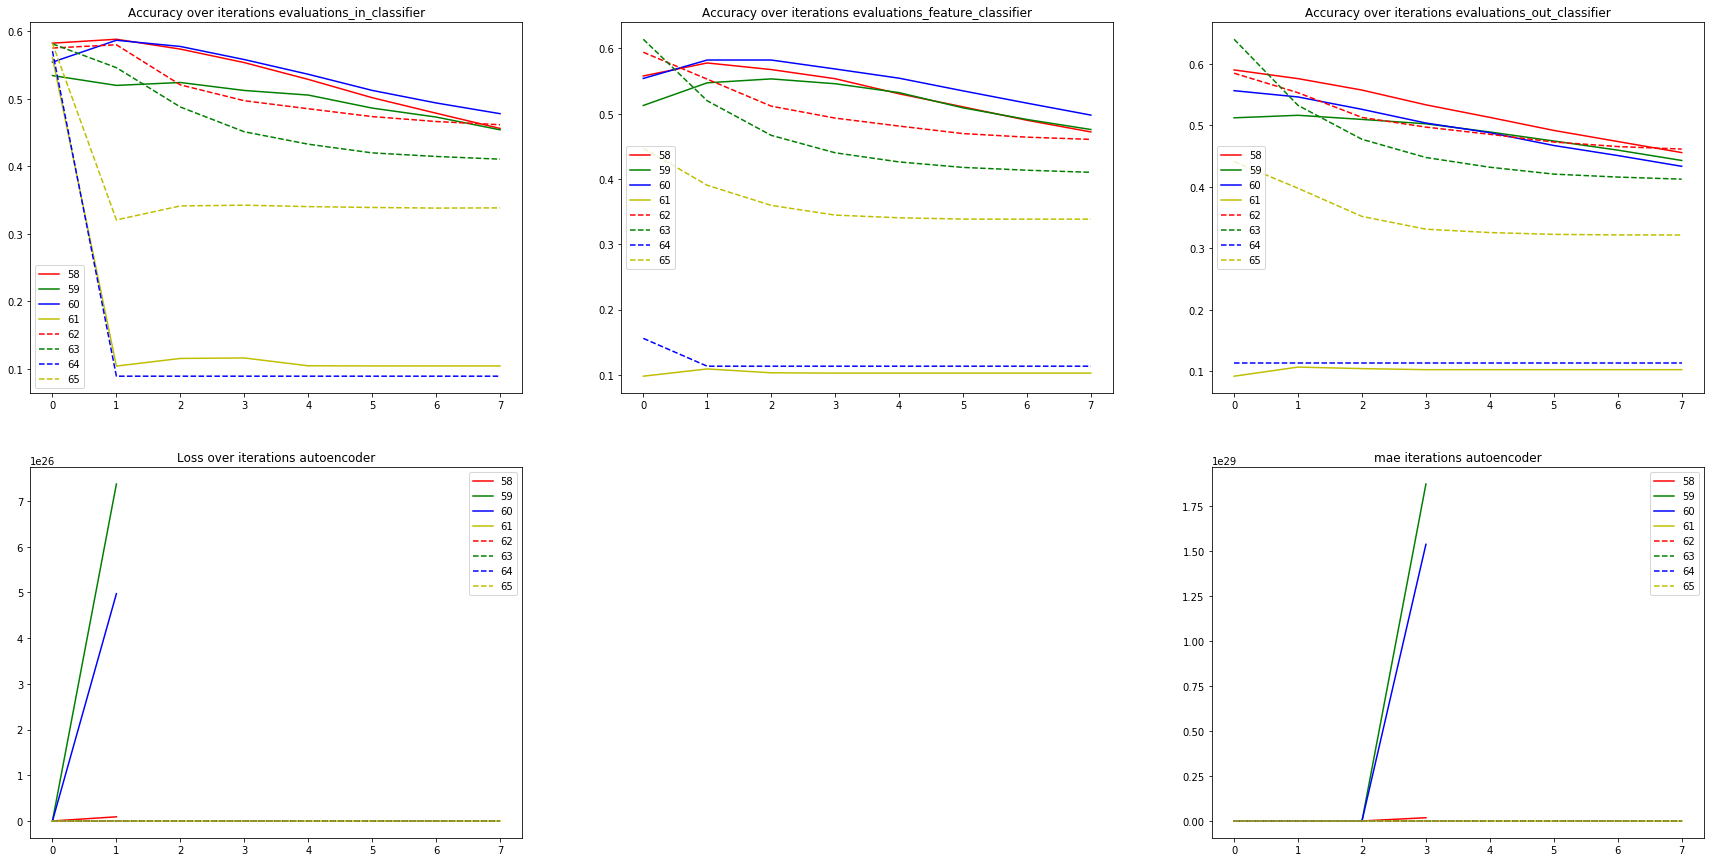

predictions_df_90


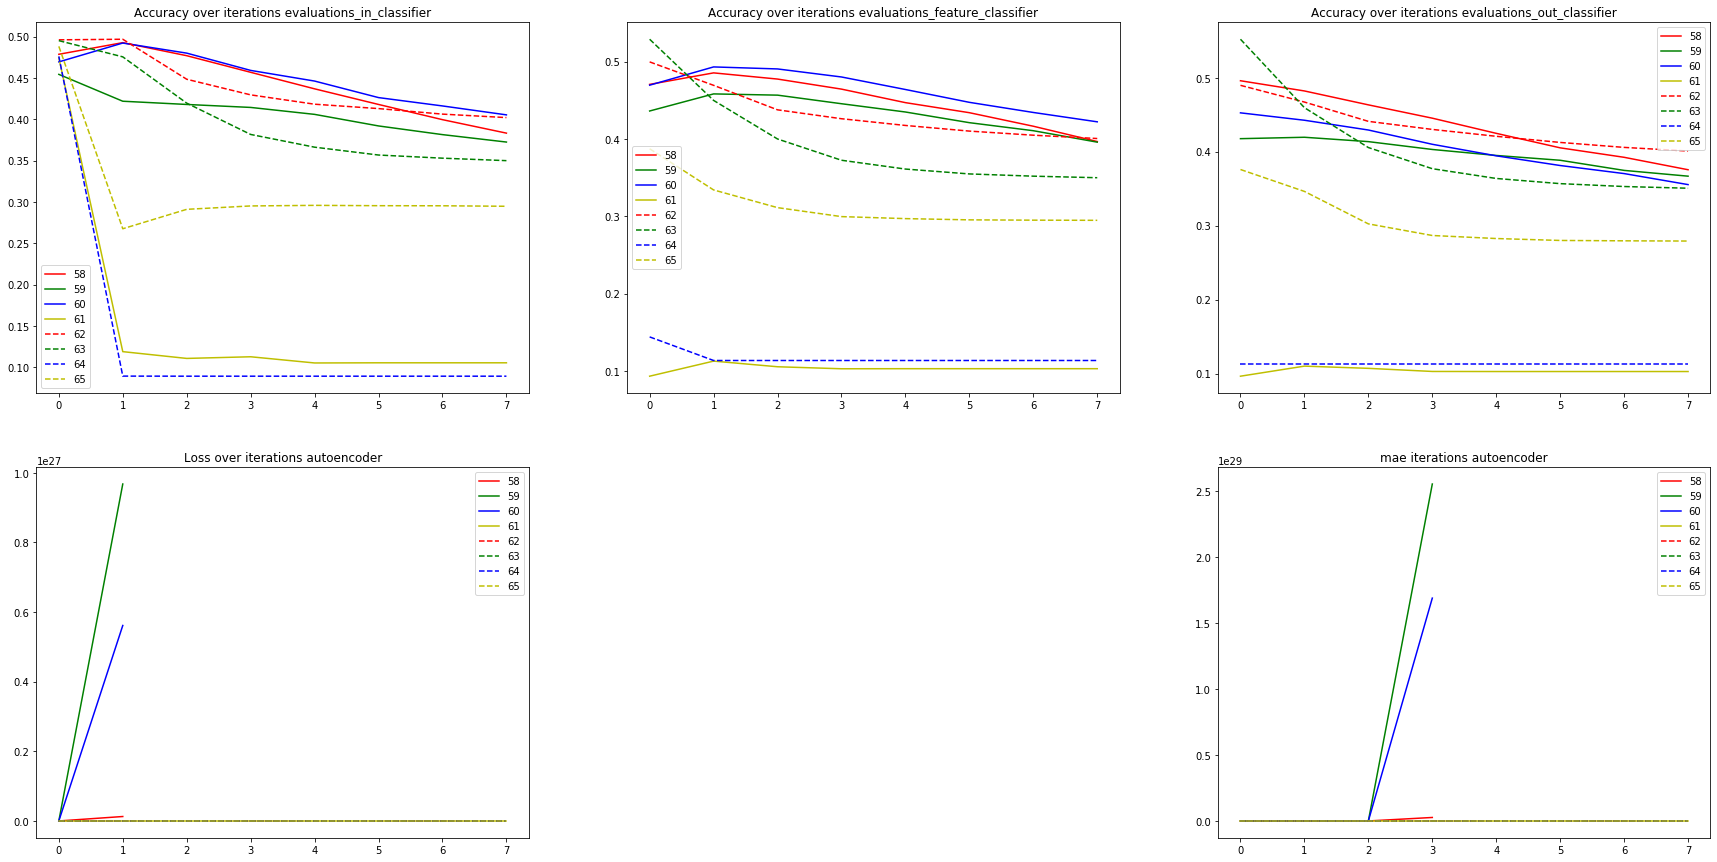

predictions_df_100


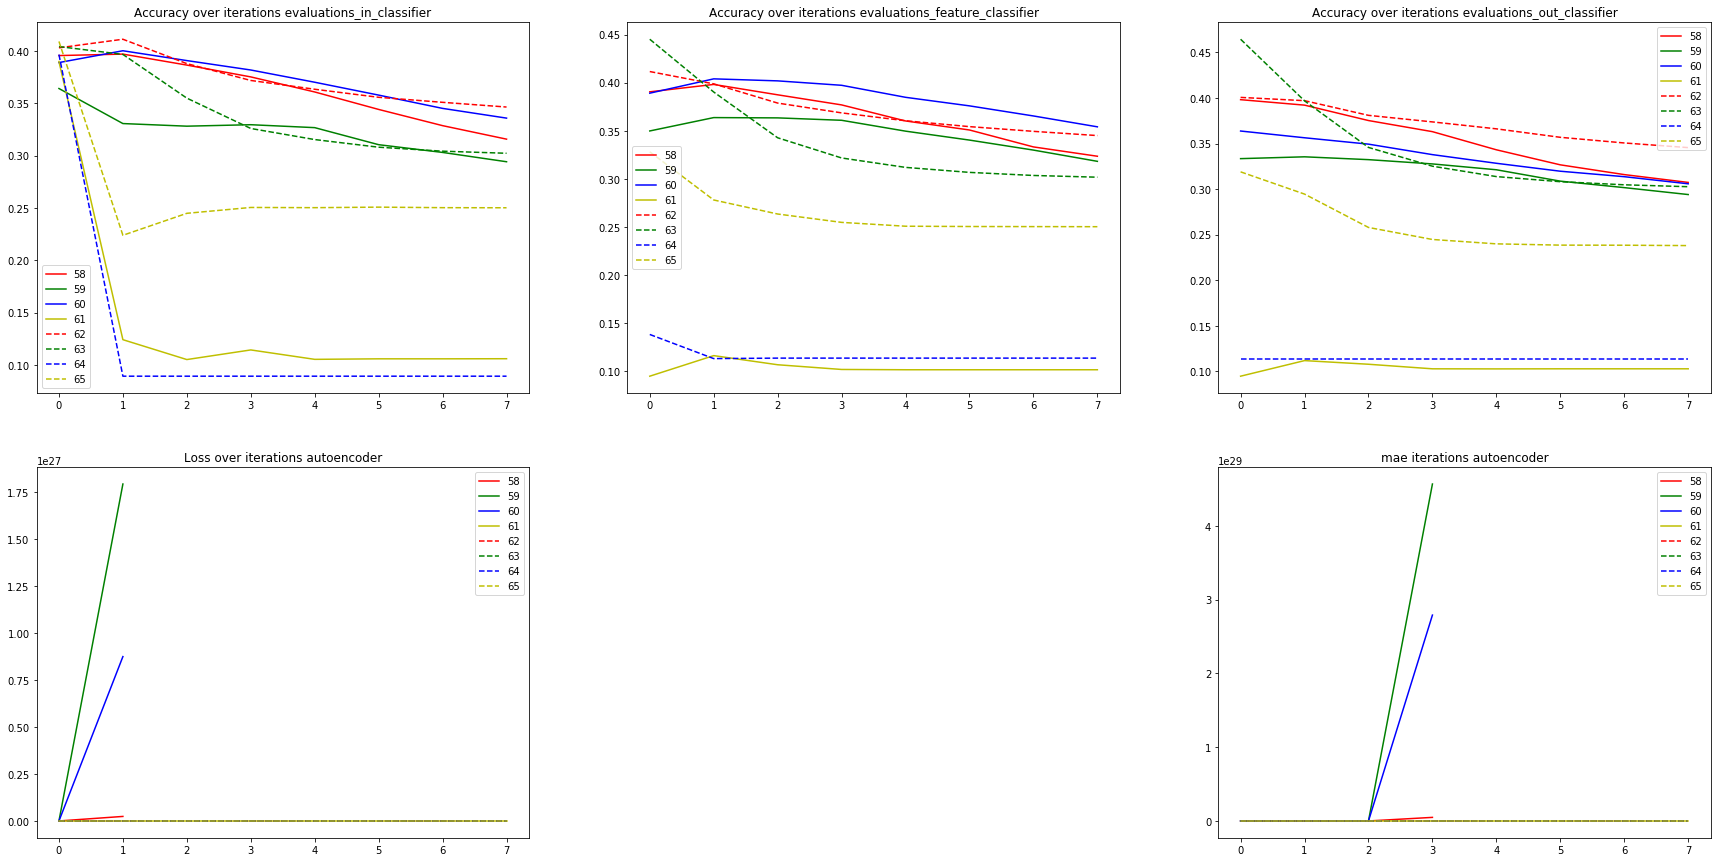

In [11]:
for index in name_list:
    compare(index)

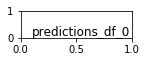

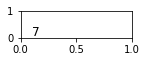

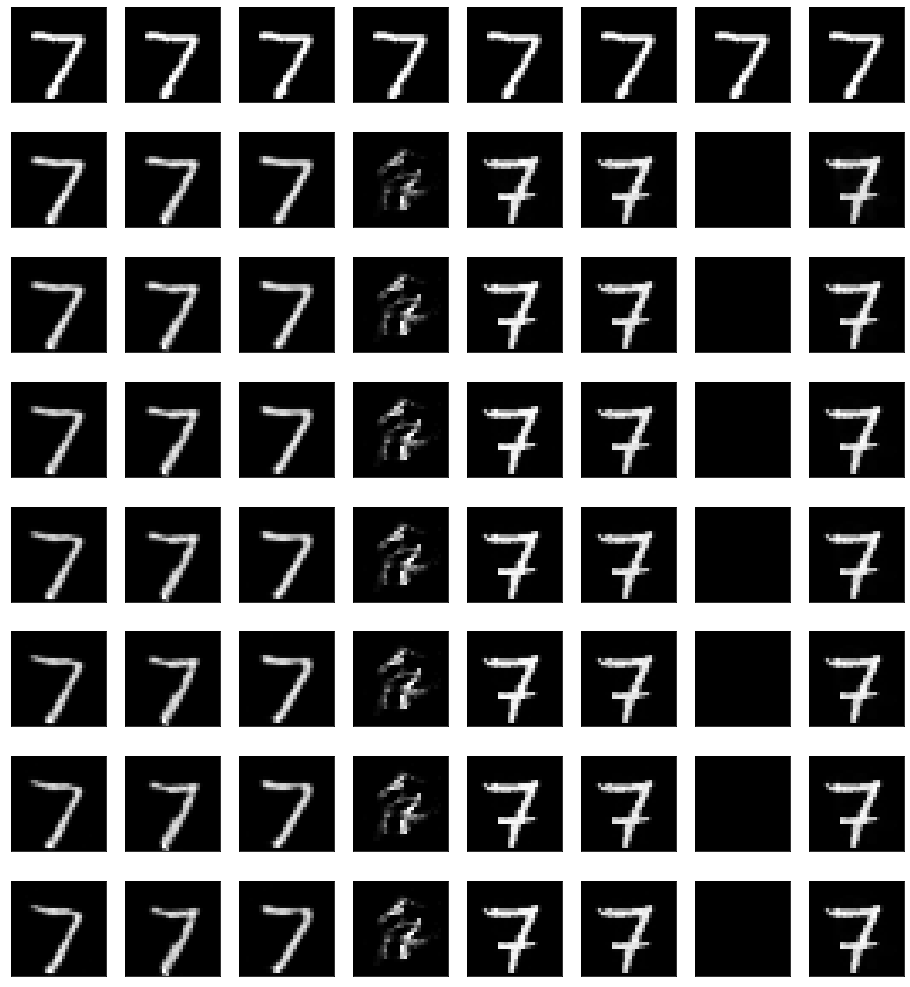

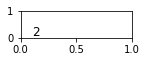

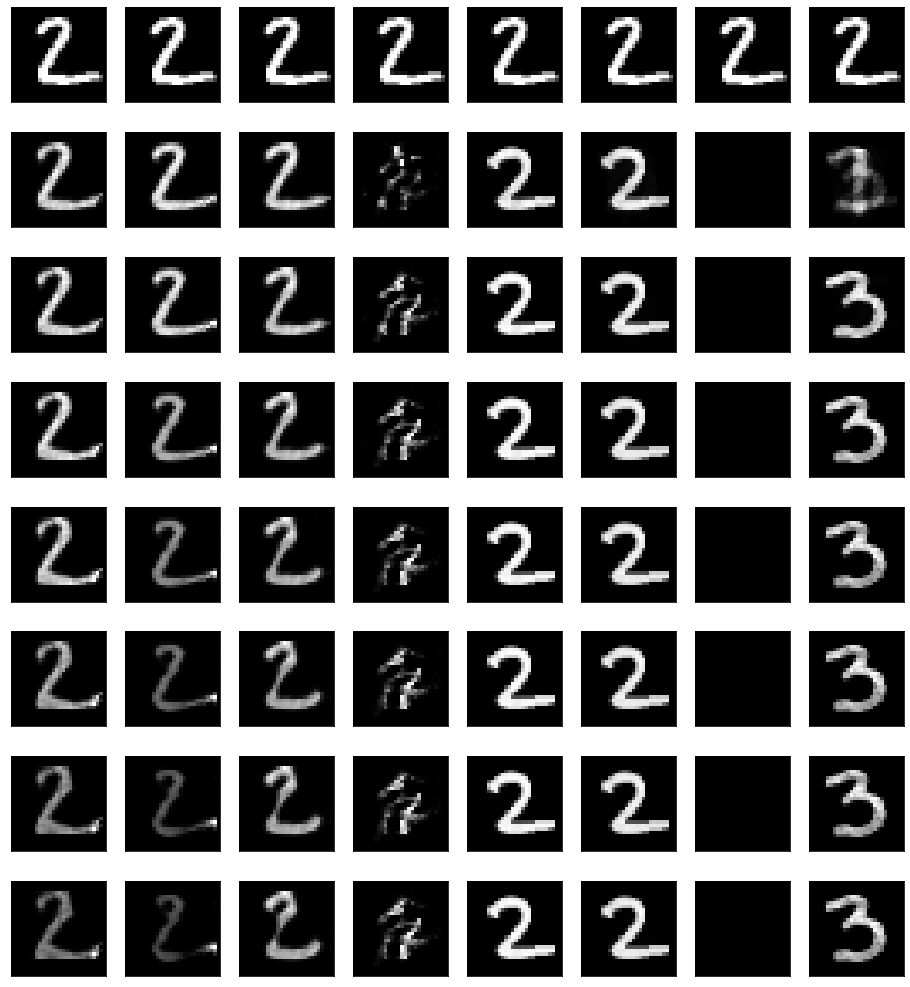

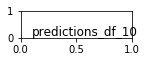

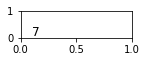

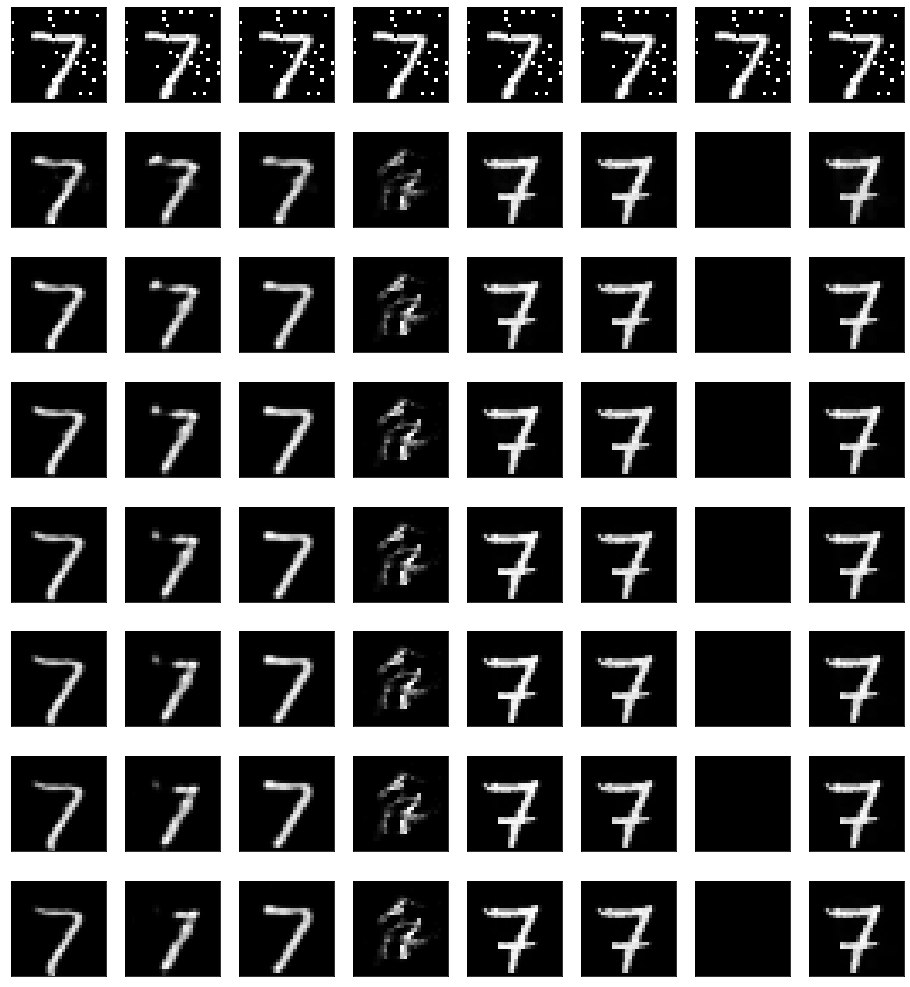

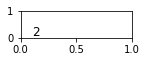

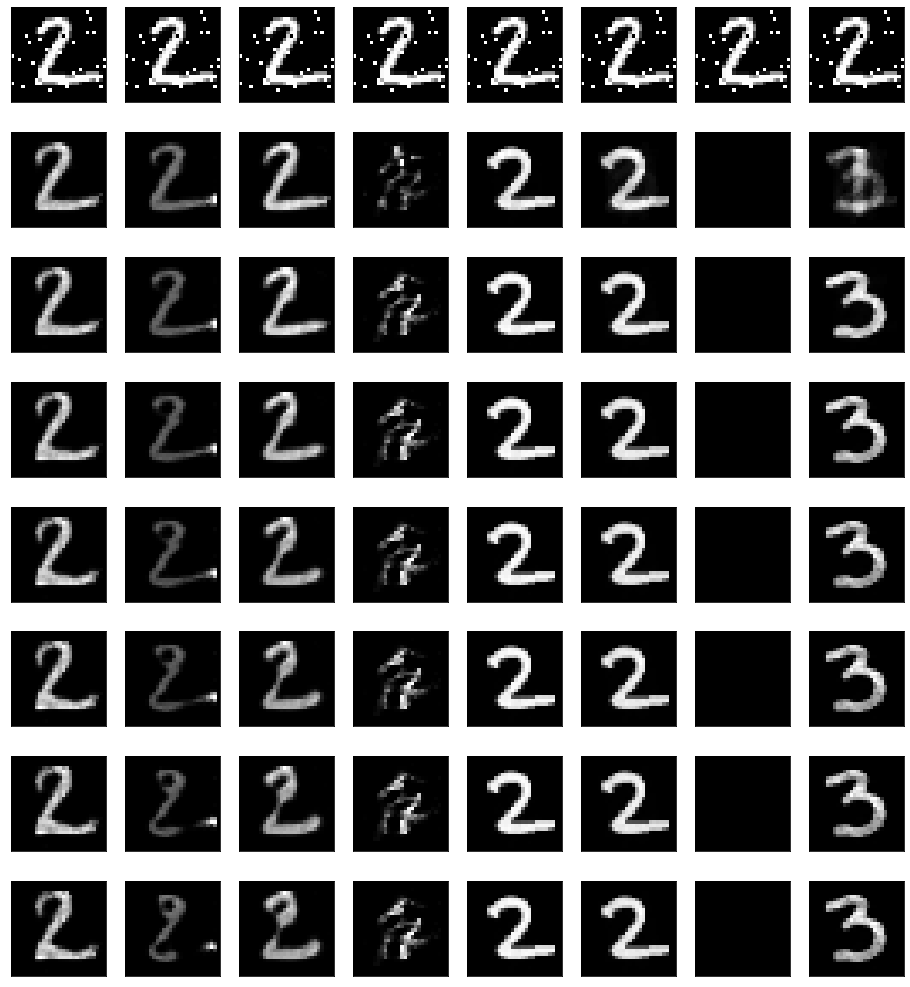

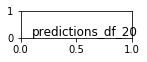

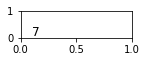

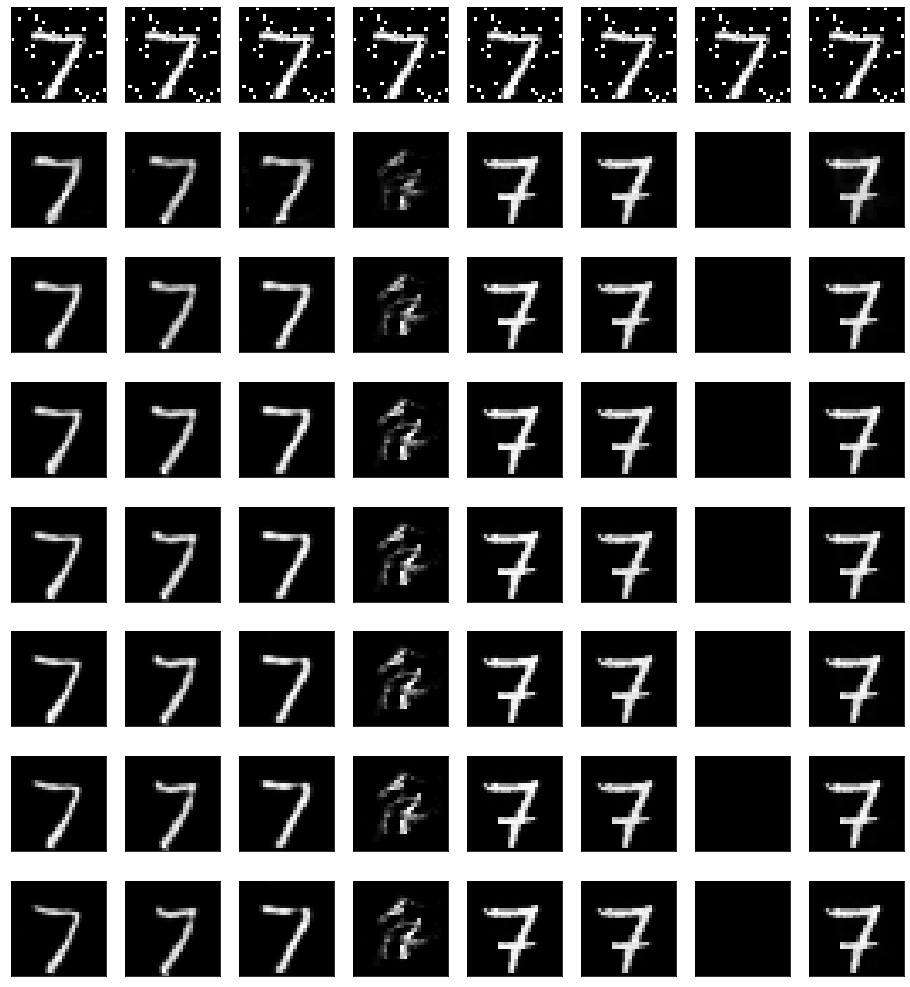

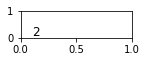

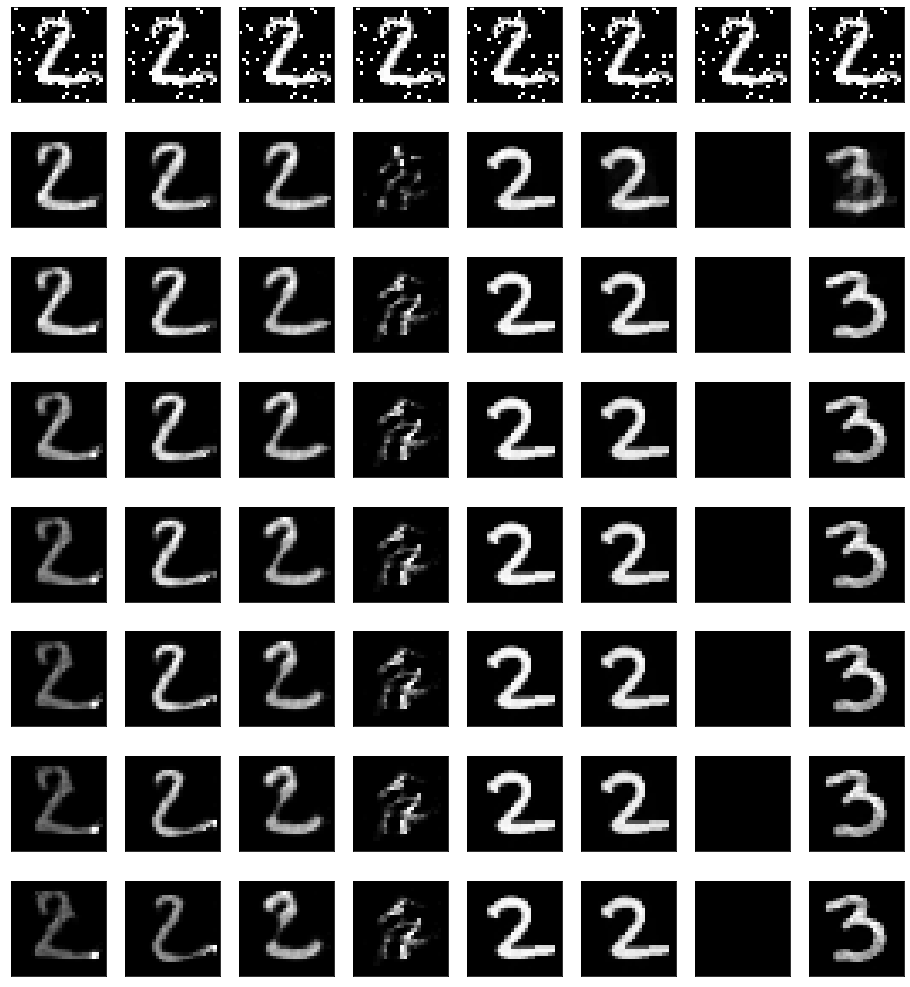

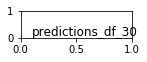

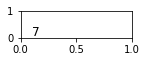

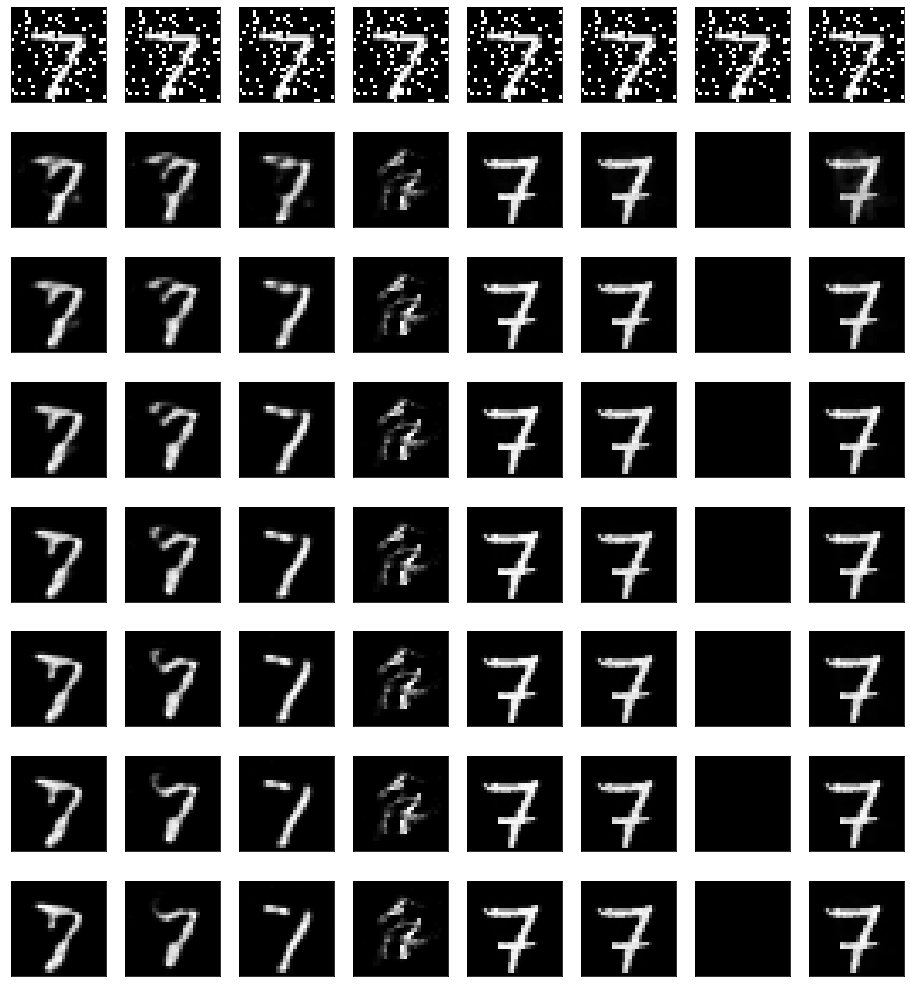

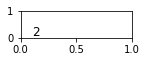

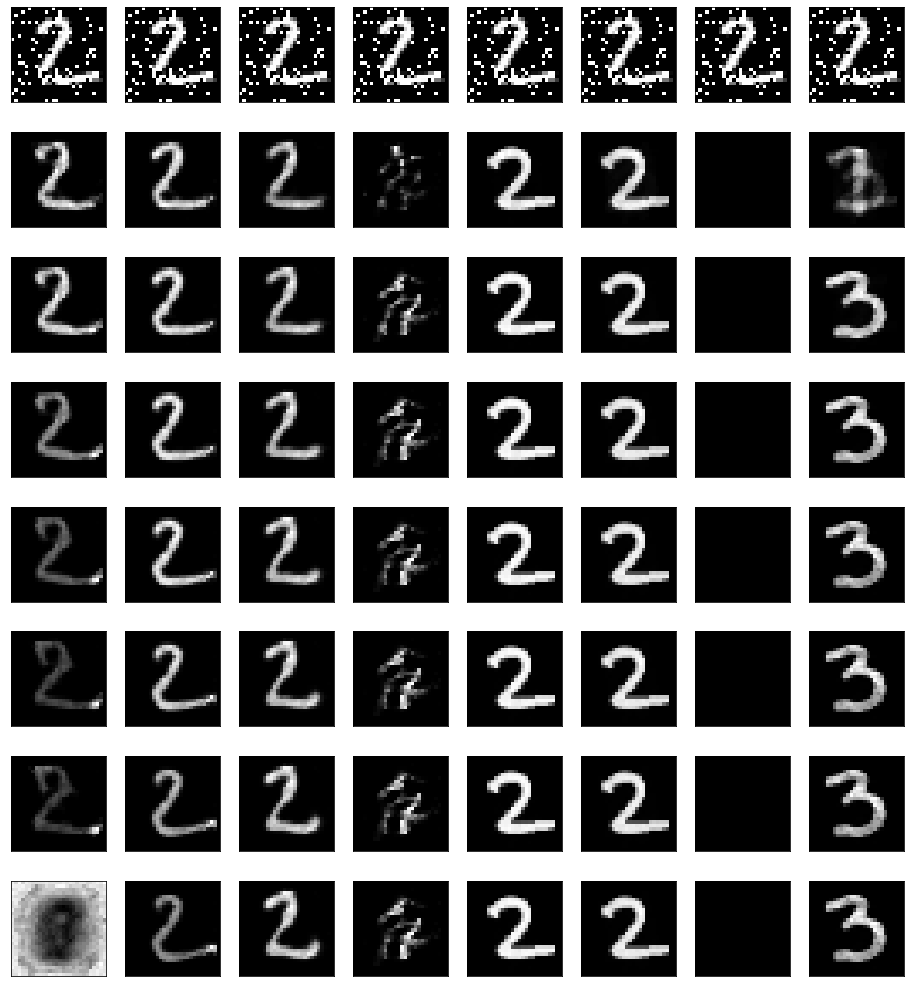

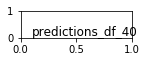

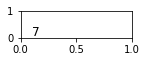

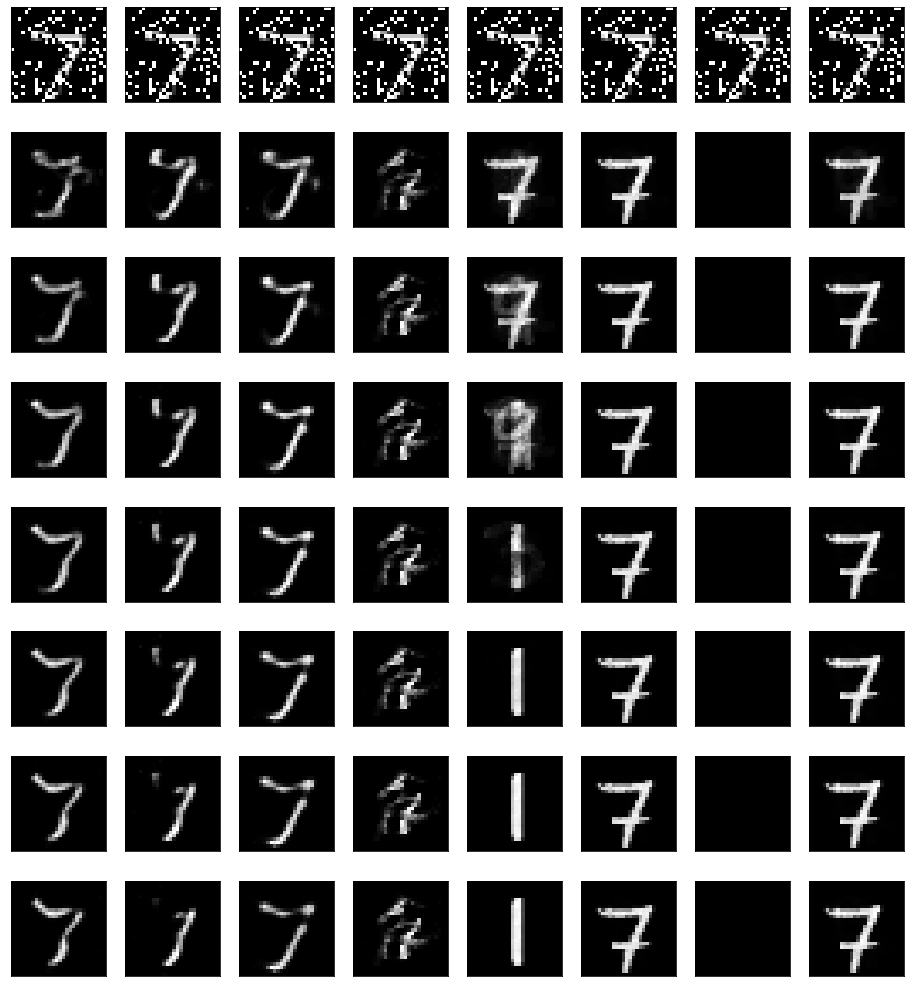

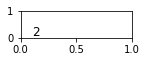

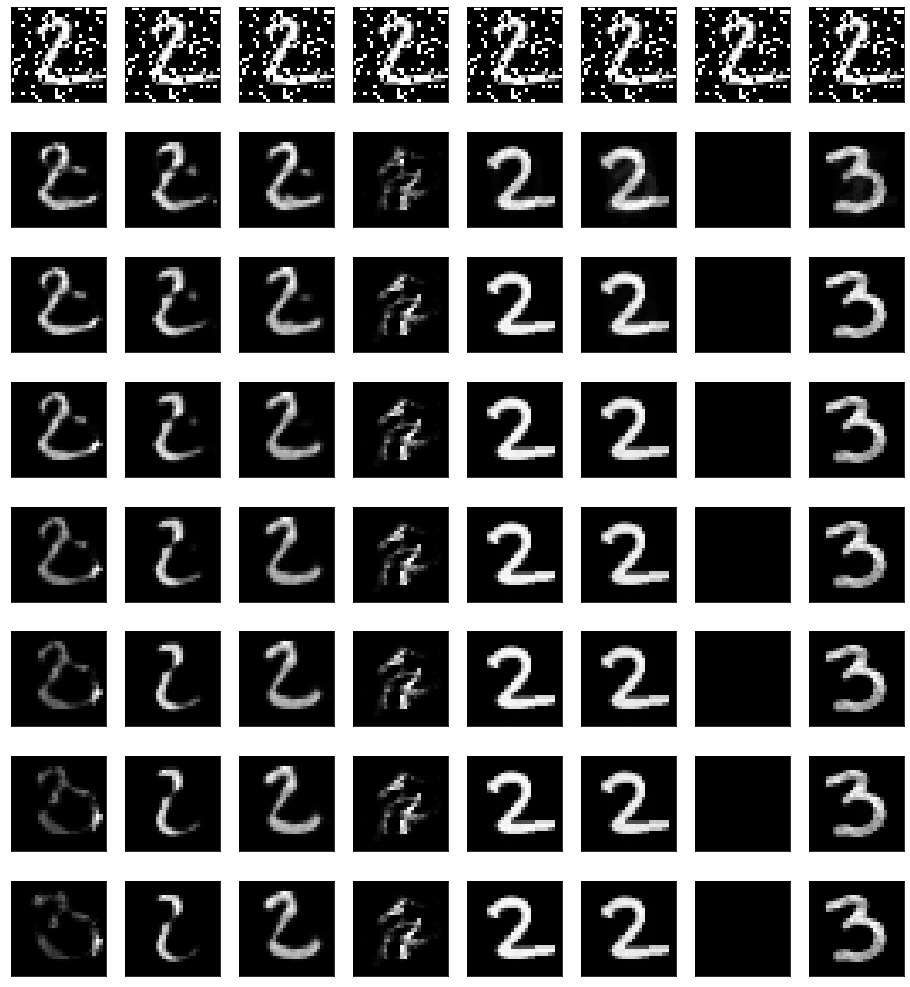

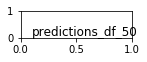

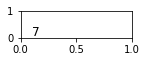

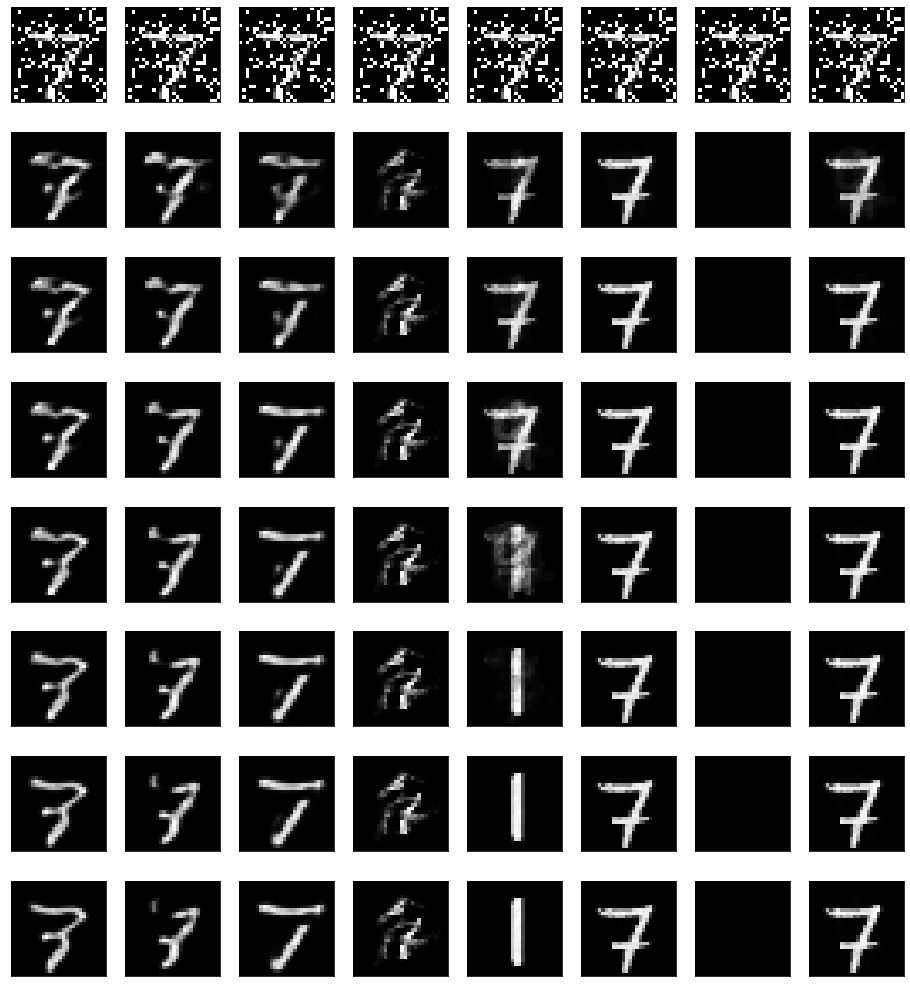

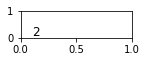

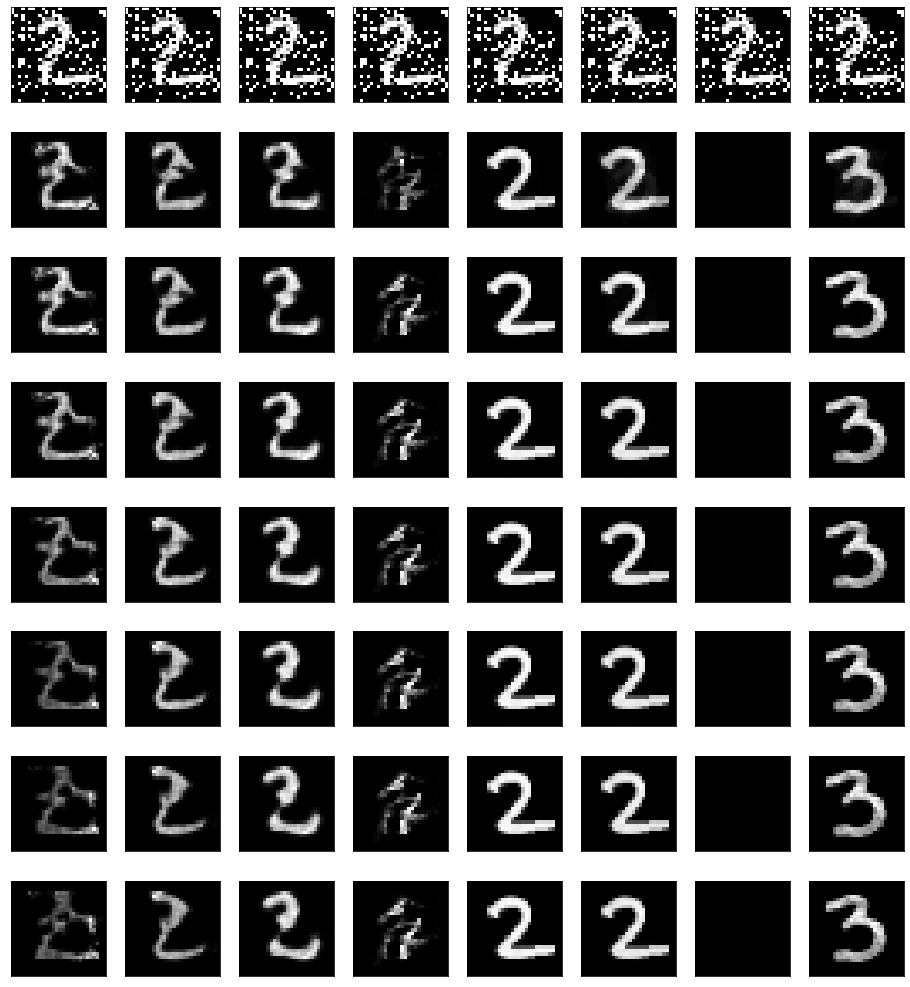

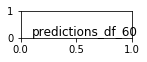

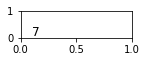

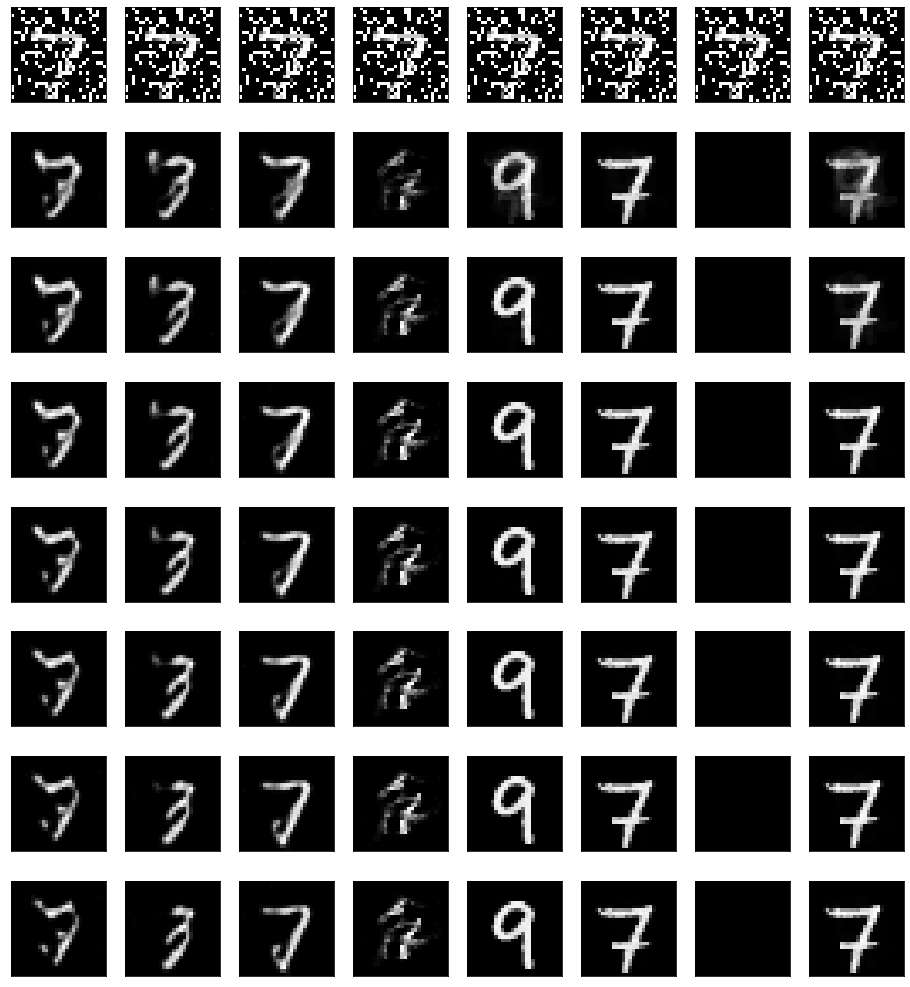

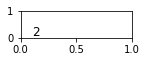

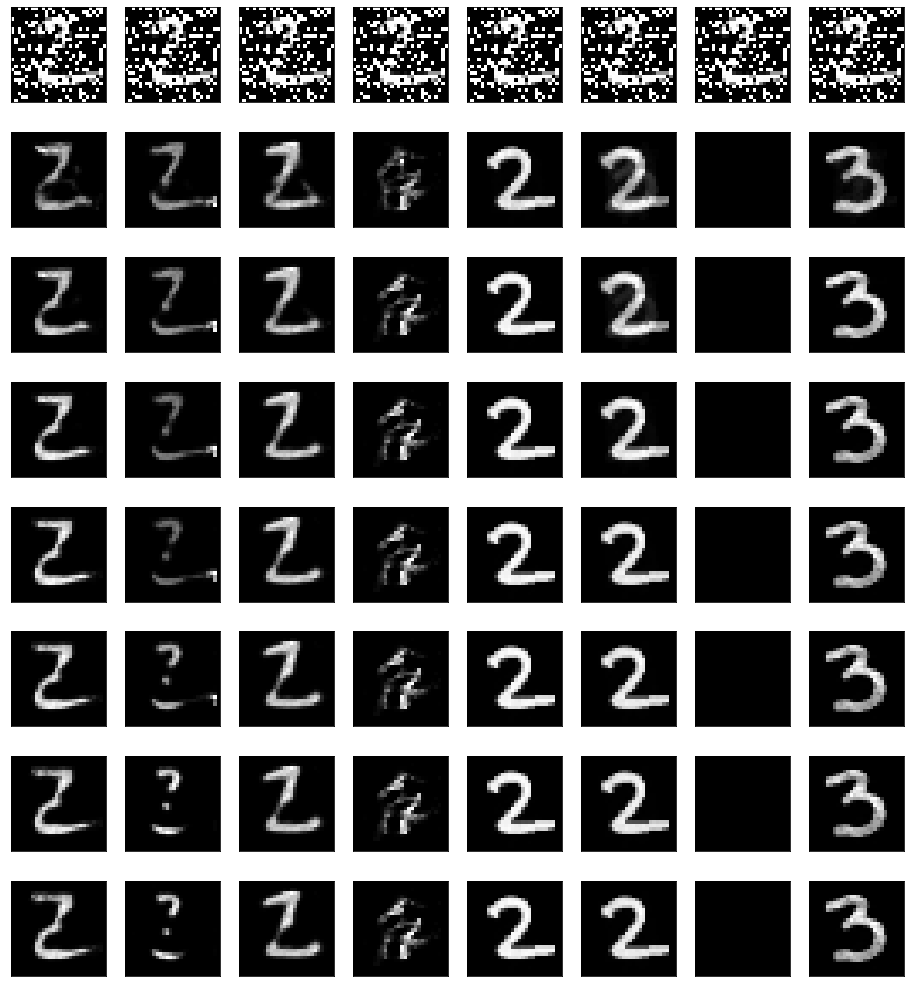

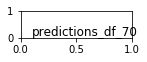

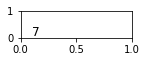

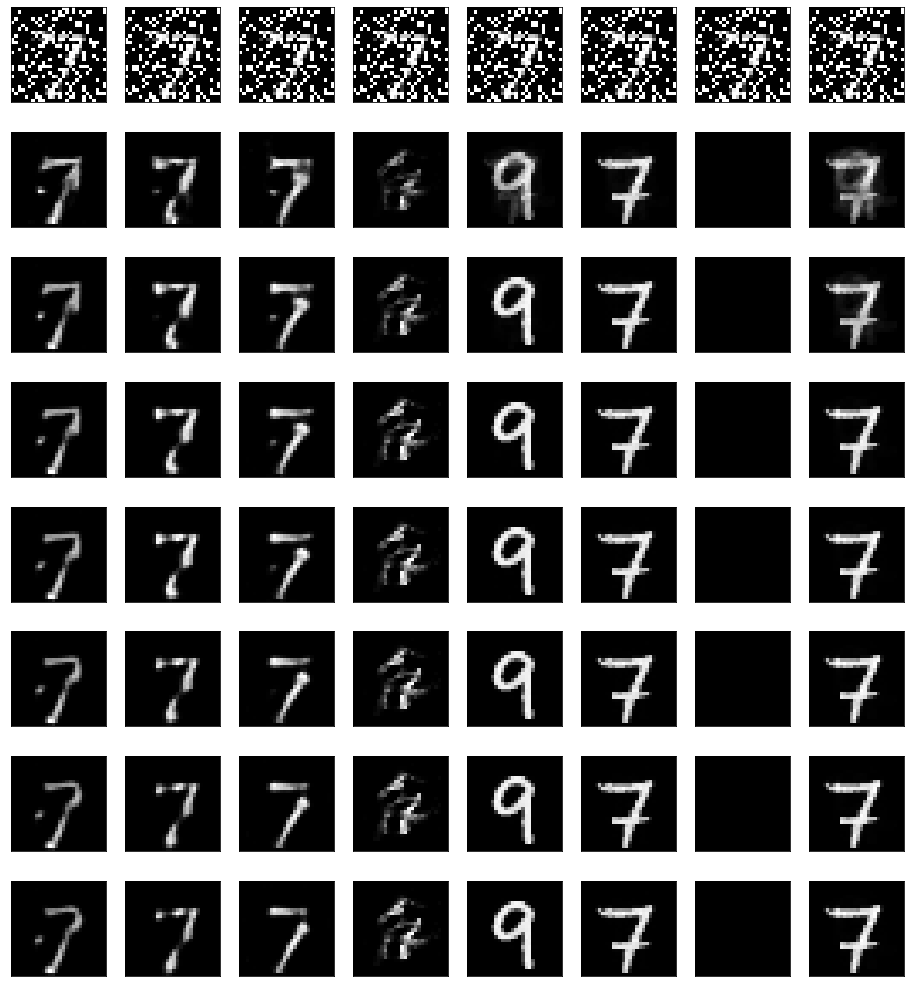

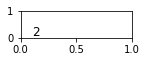

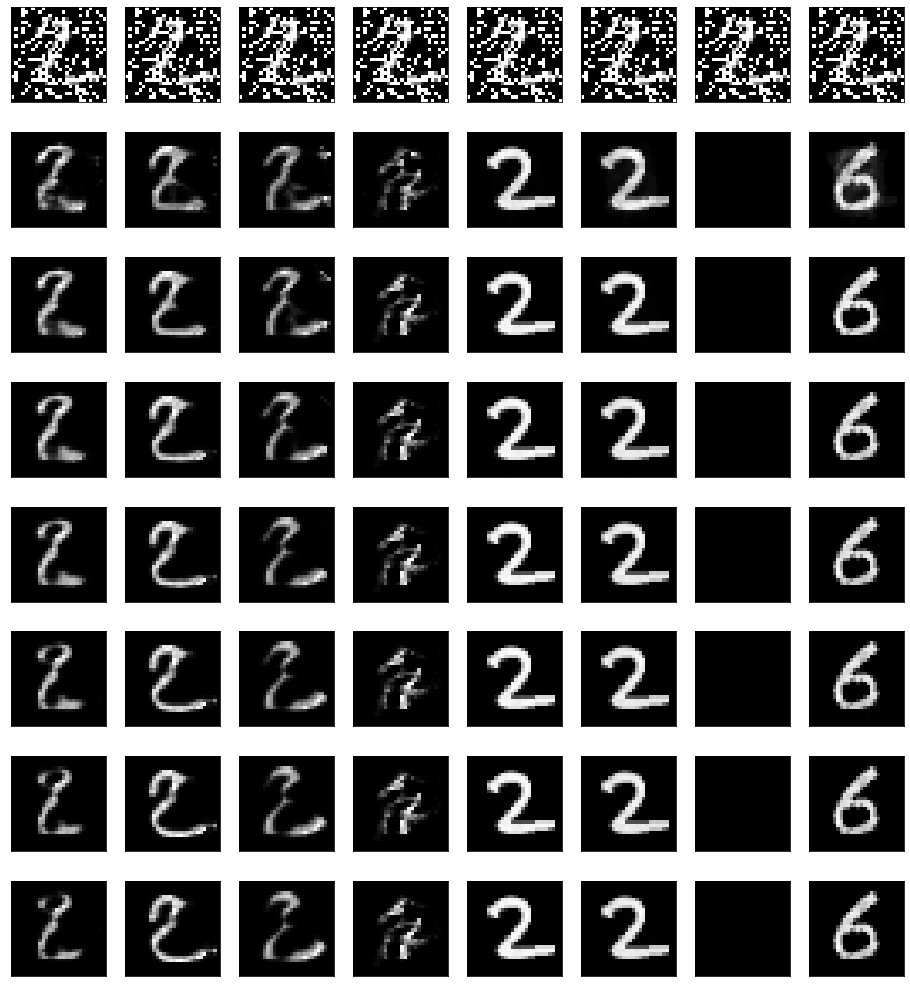

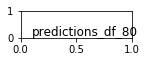

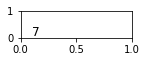

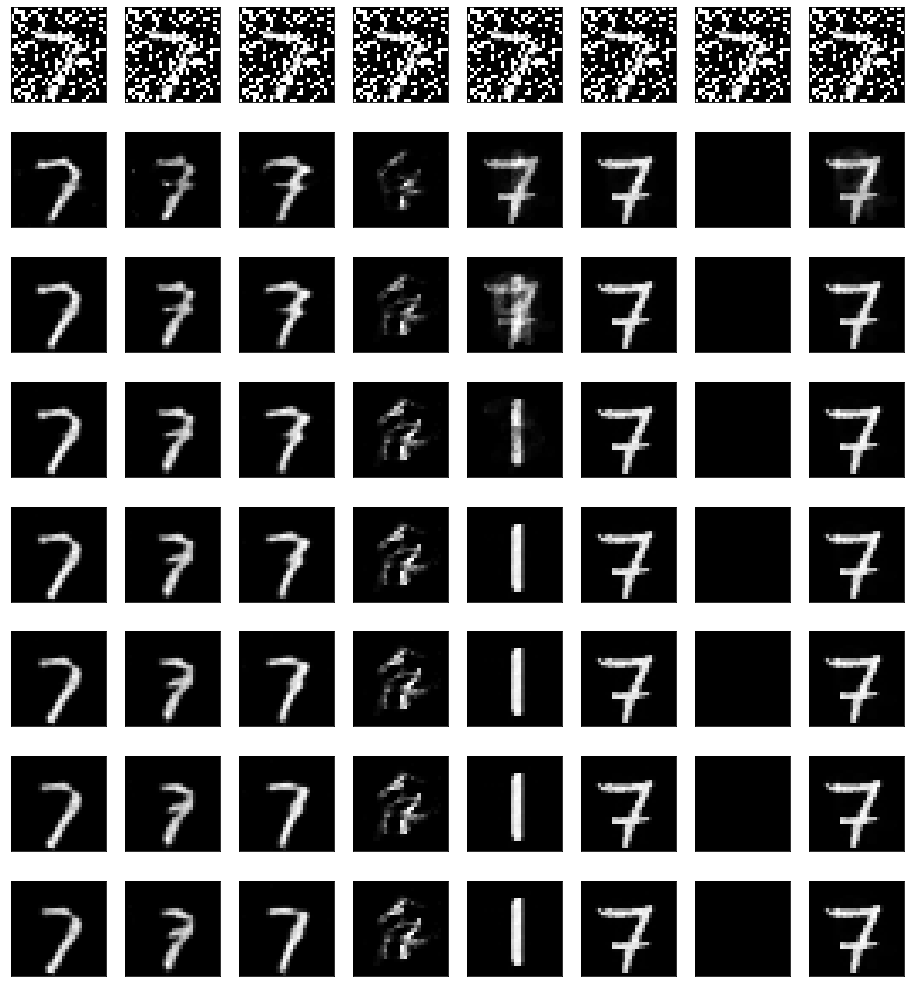

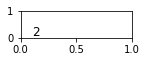

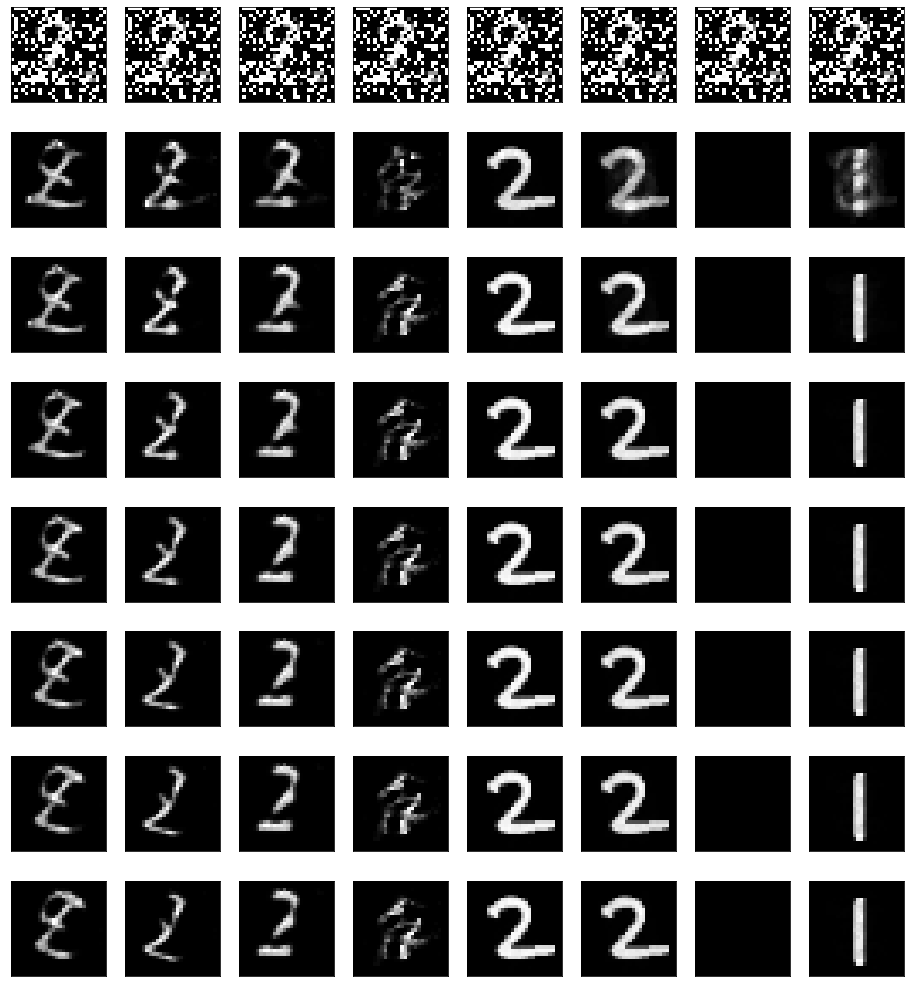

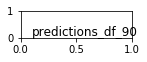

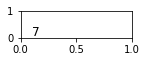

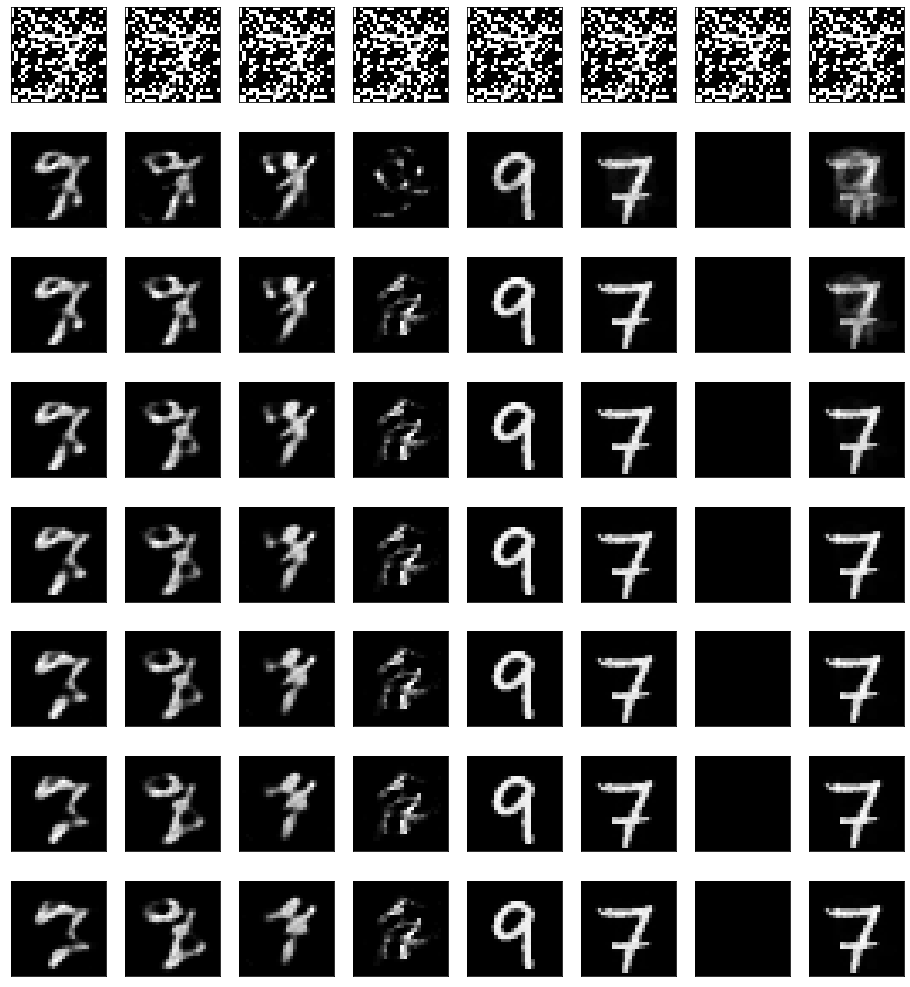

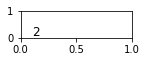

/home/hicky/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/hicky/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/hicky/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/hicky/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/hicky/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


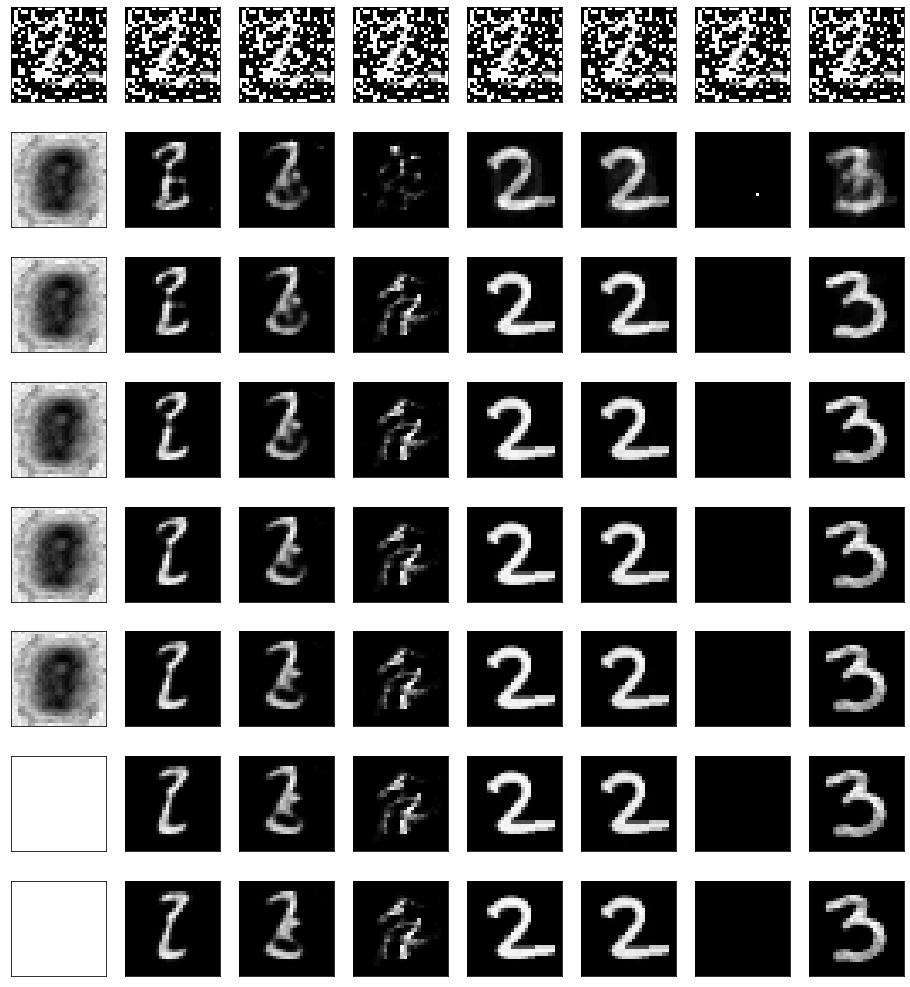

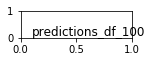

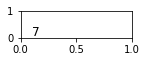

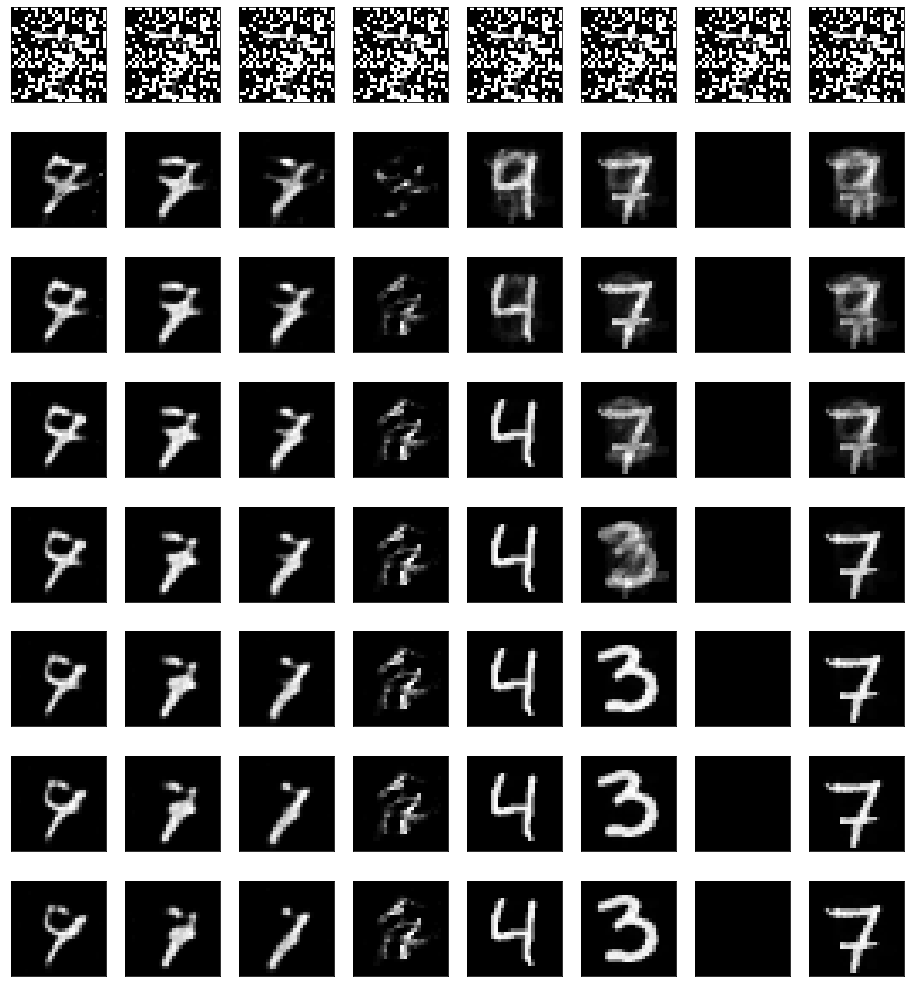

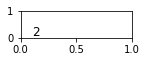

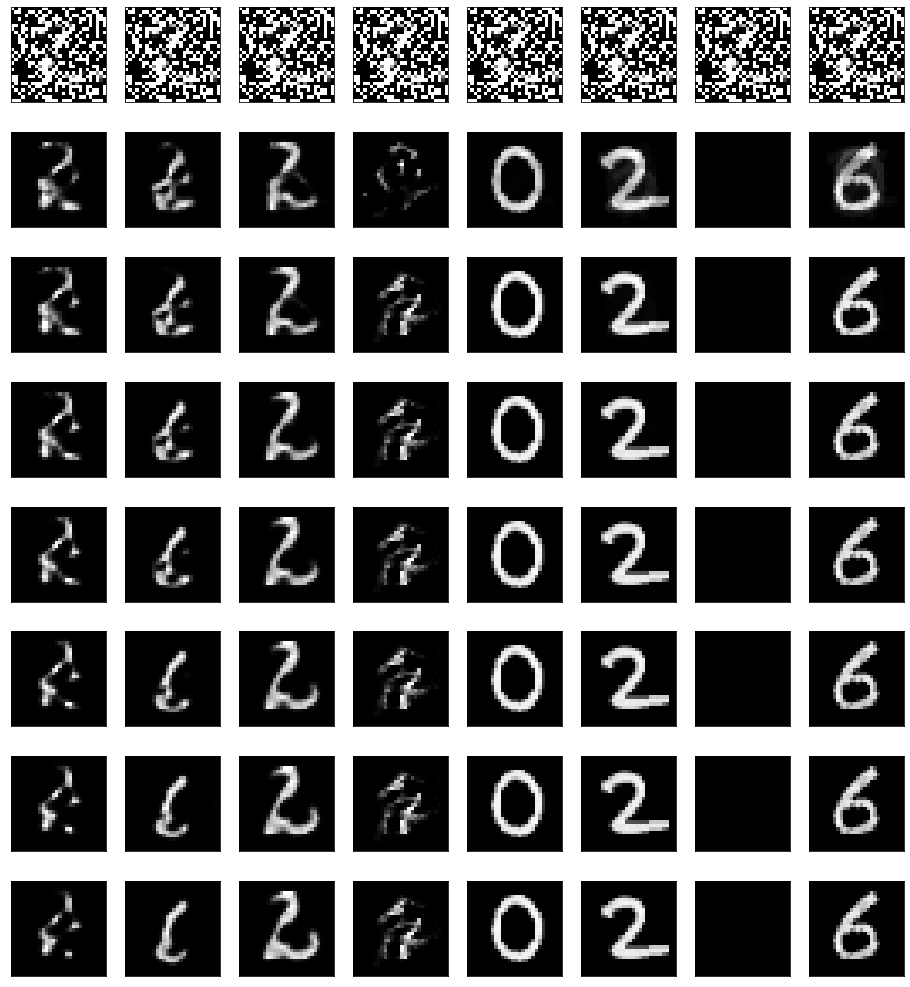

In [12]:
for data in name_list:
    df=[]
    plt.figure(figsize=(2,0.5))
    plt.text(0.1, 0.1, data, fontsize=12) 
    plt.show()
    num=['7','2','1','0','4']
    df = pd.concat([pd.read_pickle(exp.artifacts[data].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in experiments],axis=1,keys=[str(exp.id) for exp in experiments])
    for i in range(5):
        print_imm(np.array(df.applymap(lambda x: x[i])),num[i])
    df=[]